38.4 dB noise convergence error(Middlestart:  0.066649739539722 %
38.4 dB noise convergence error(Highstart:  0.005740929779993607 %
38.4 dB noise convergence error(Lowstart:  0.07936240341594596 %
21.8 dB noise convergence error(Middlestart:  0.06077211806263672 %
21.8 dB noise convergence error(Highstart:  0.0493796394324409 %
21.8 dB noise convergence error(Lowstart:  0.02784025572724856 %
7.8 dB noise convergence error(Middlestart:  0.09593220221574823 %
7.8 dB noise convergence error(Highstart:  0.34788764837345304 %
7.8 dB noise convergence error(Lowstart:  0.22417577243176853 %
-3.0 dB noise convergence error(Middlestart:  0.248609477116725 %
-3.0 dB noise convergence error(Highstart:  0.4787276879474989 %
-3.0 dB noise convergence error(Lowstart:  0.5940396419365486 %
-13.1 dB noise convergence error(Middlestart:  3.177124925412268 %
-13.1 dB noise convergence error(Highstart:  3.7270799015285747 %
-13.1 dB noise convergence error(Lowstart:  3.5270582647036113 %


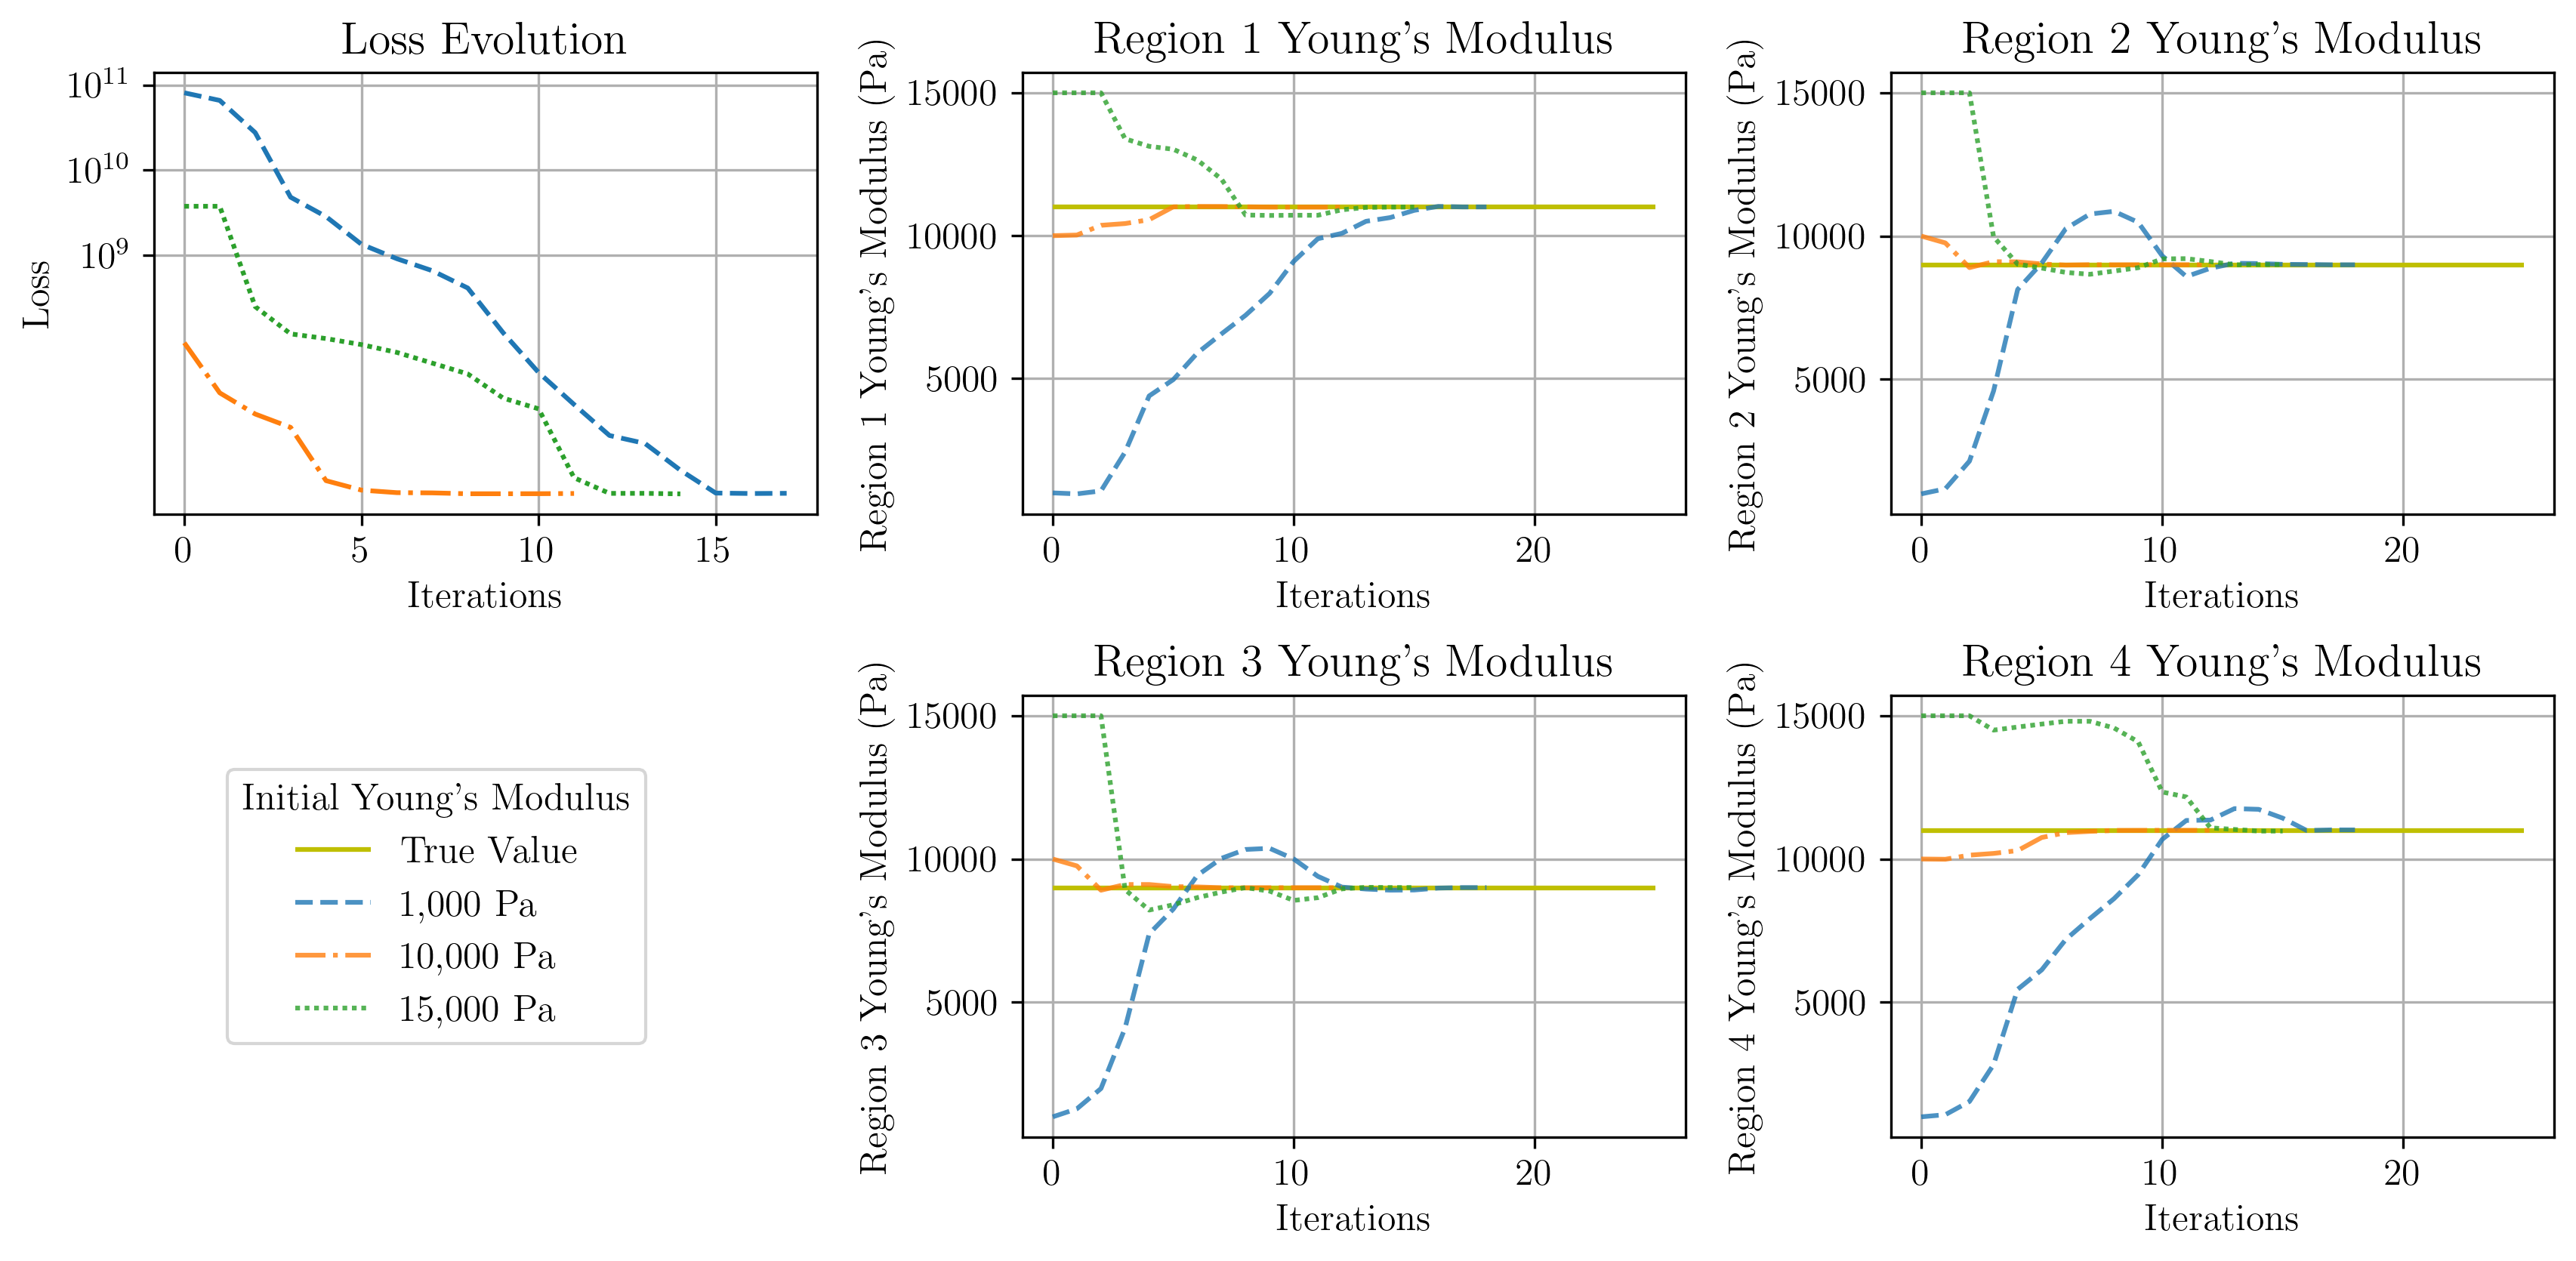

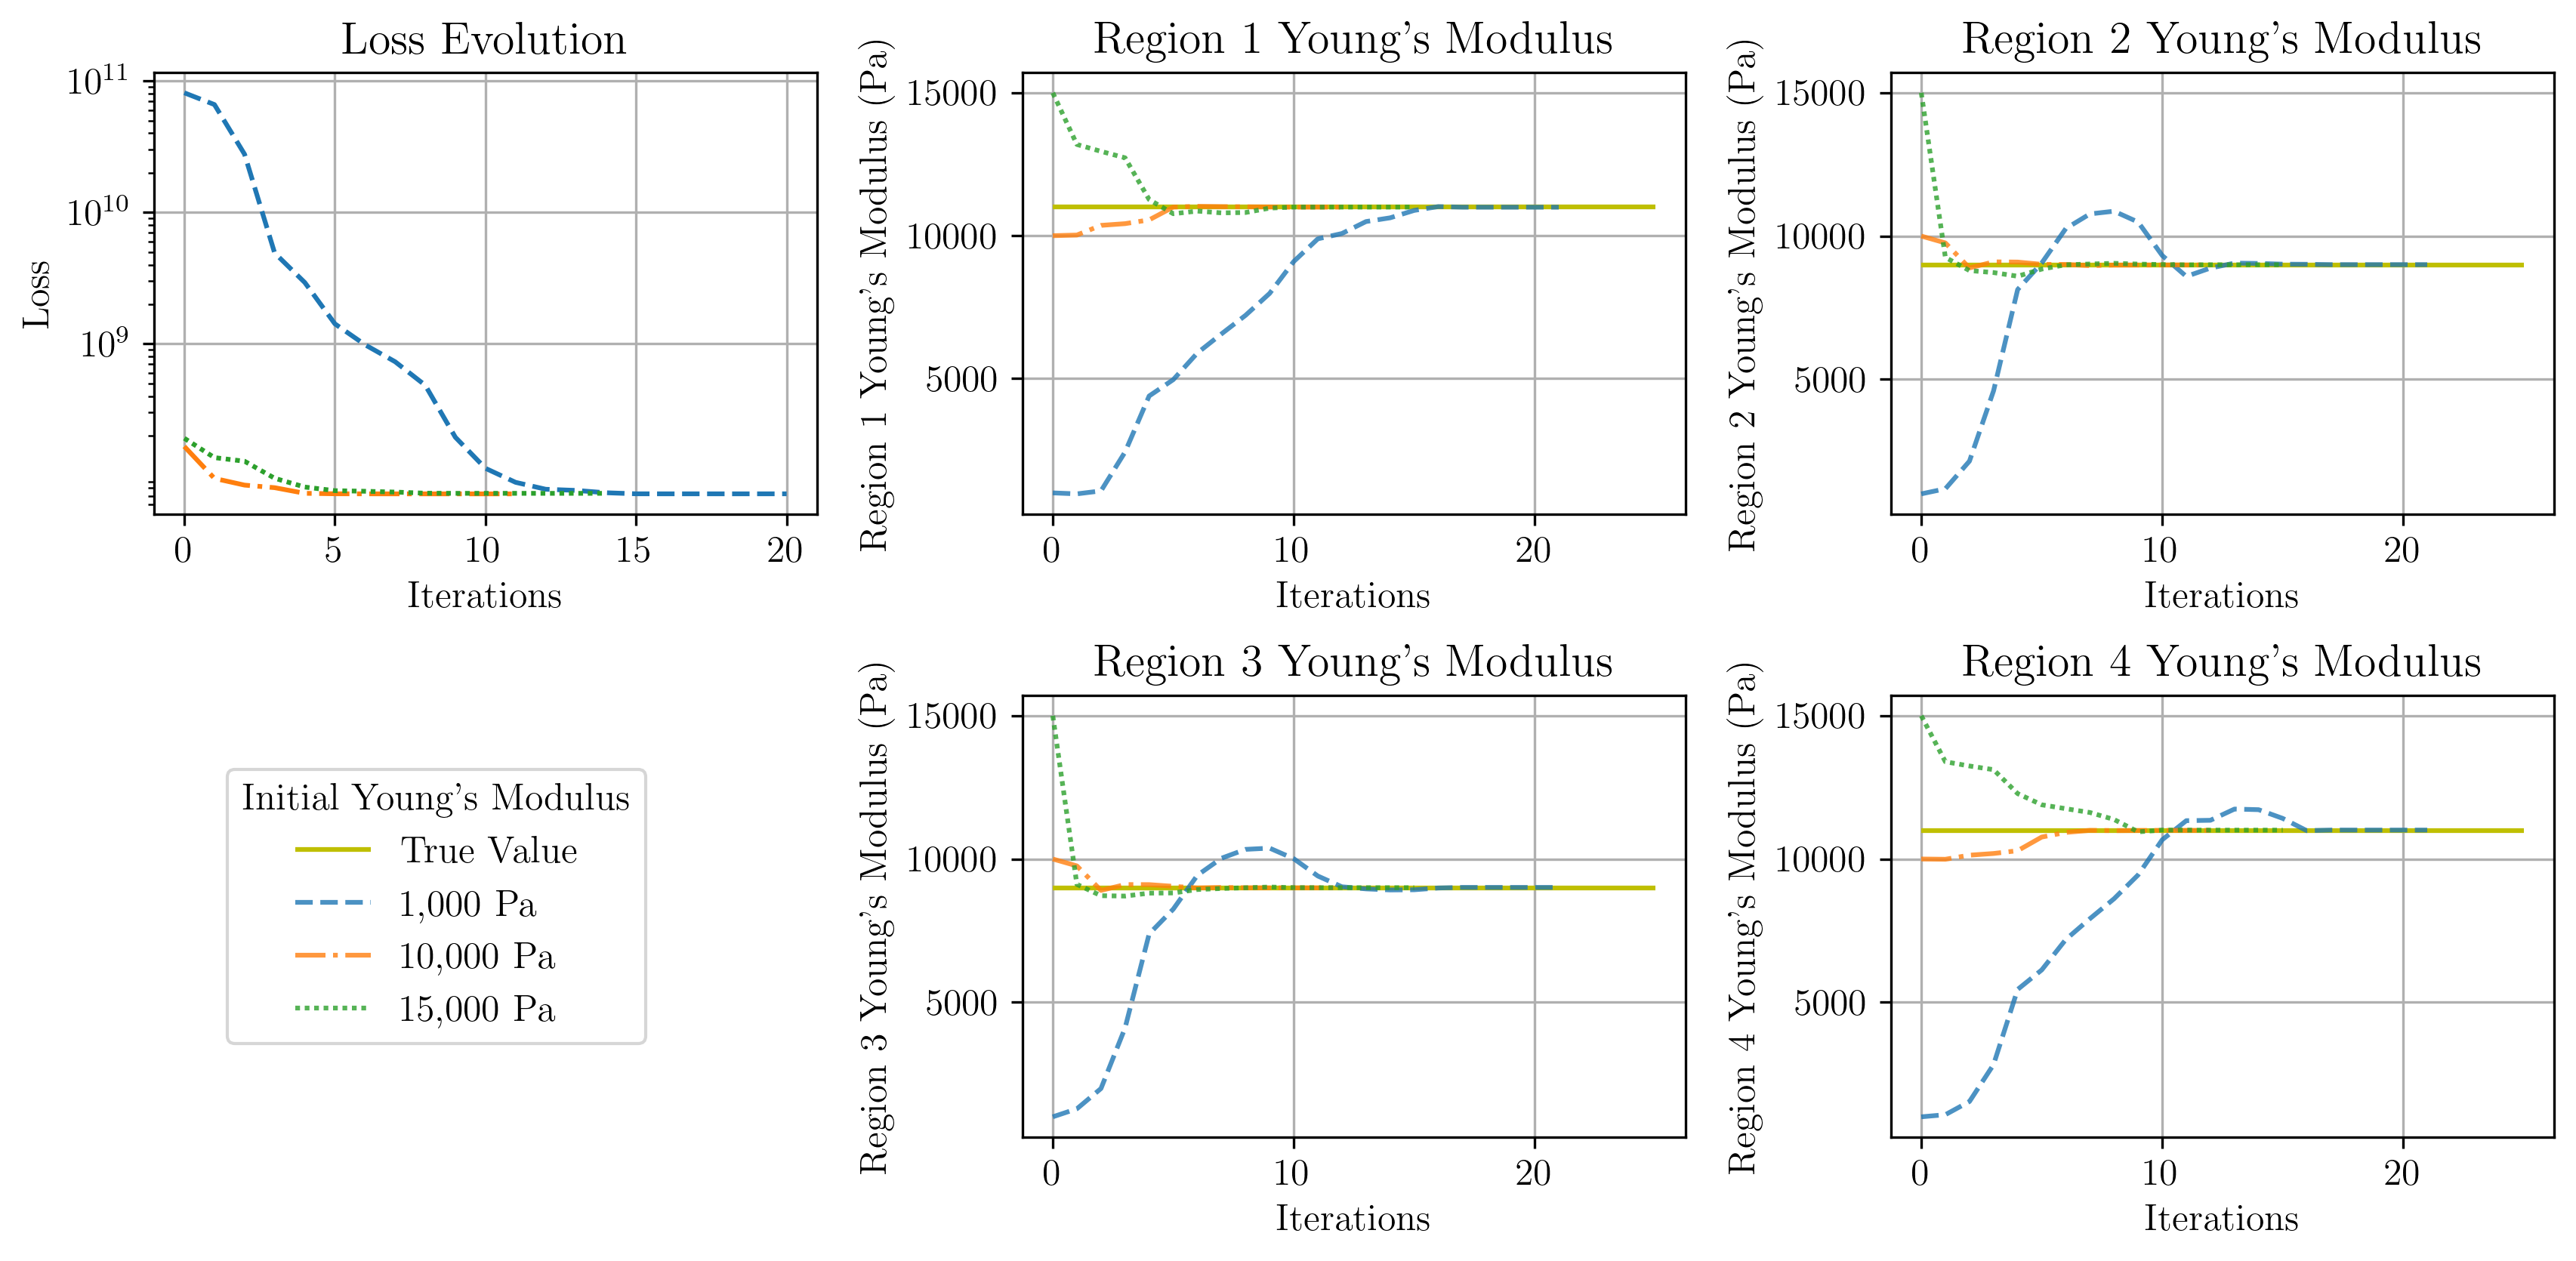

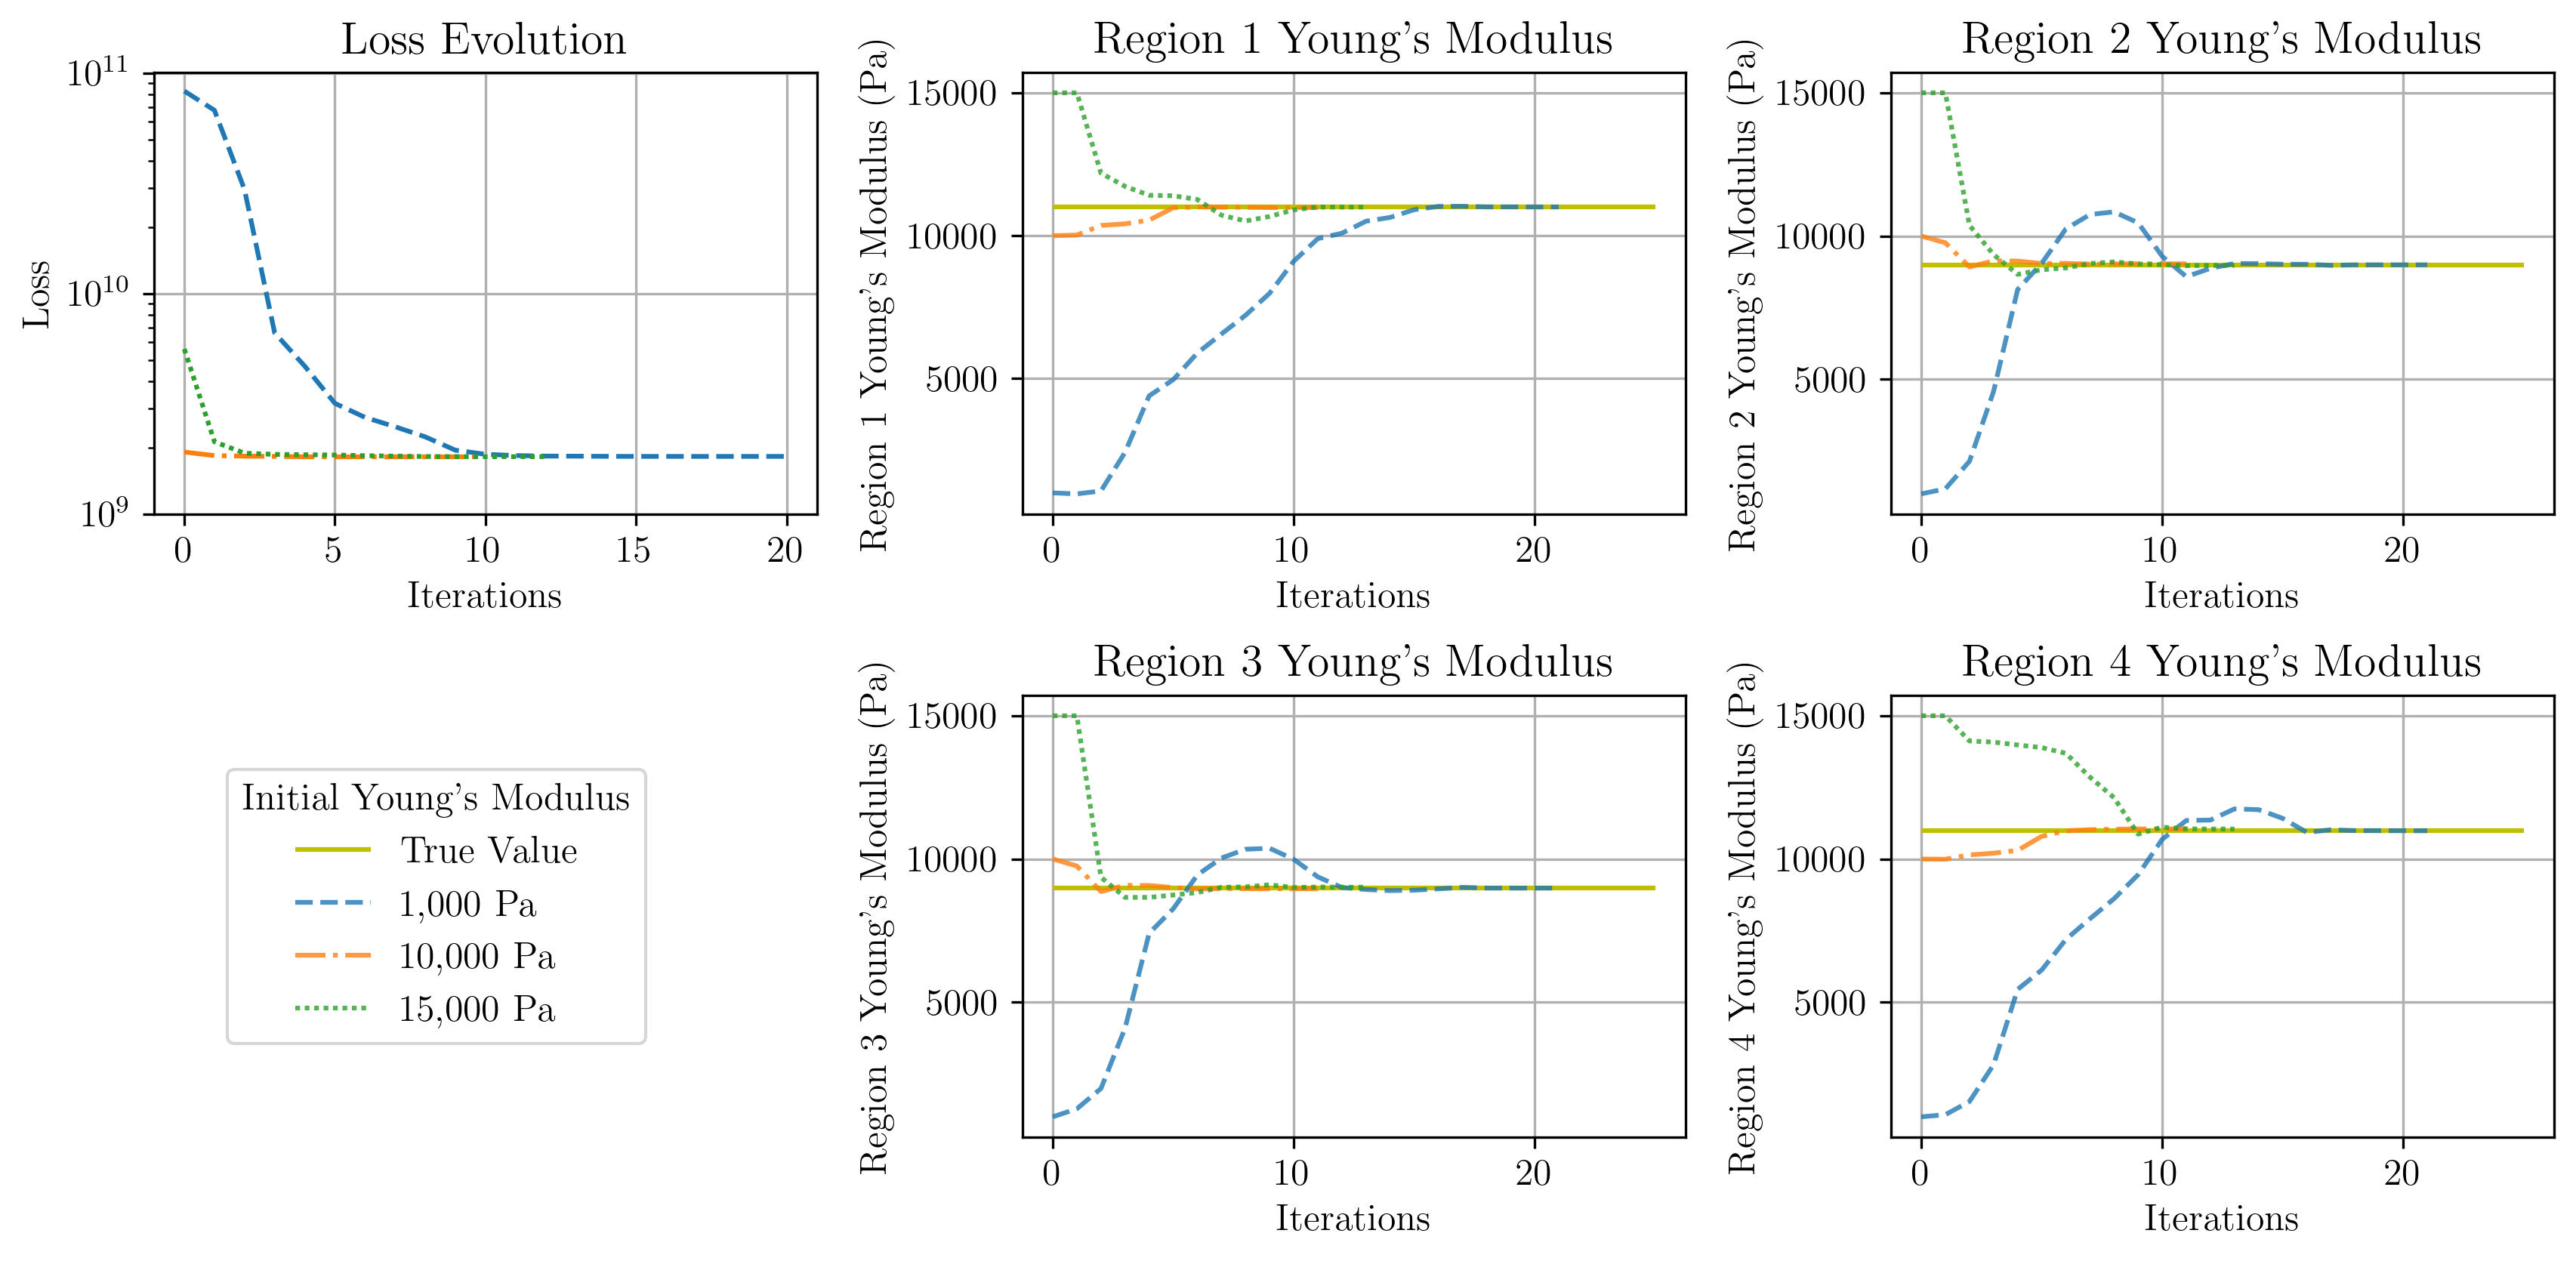

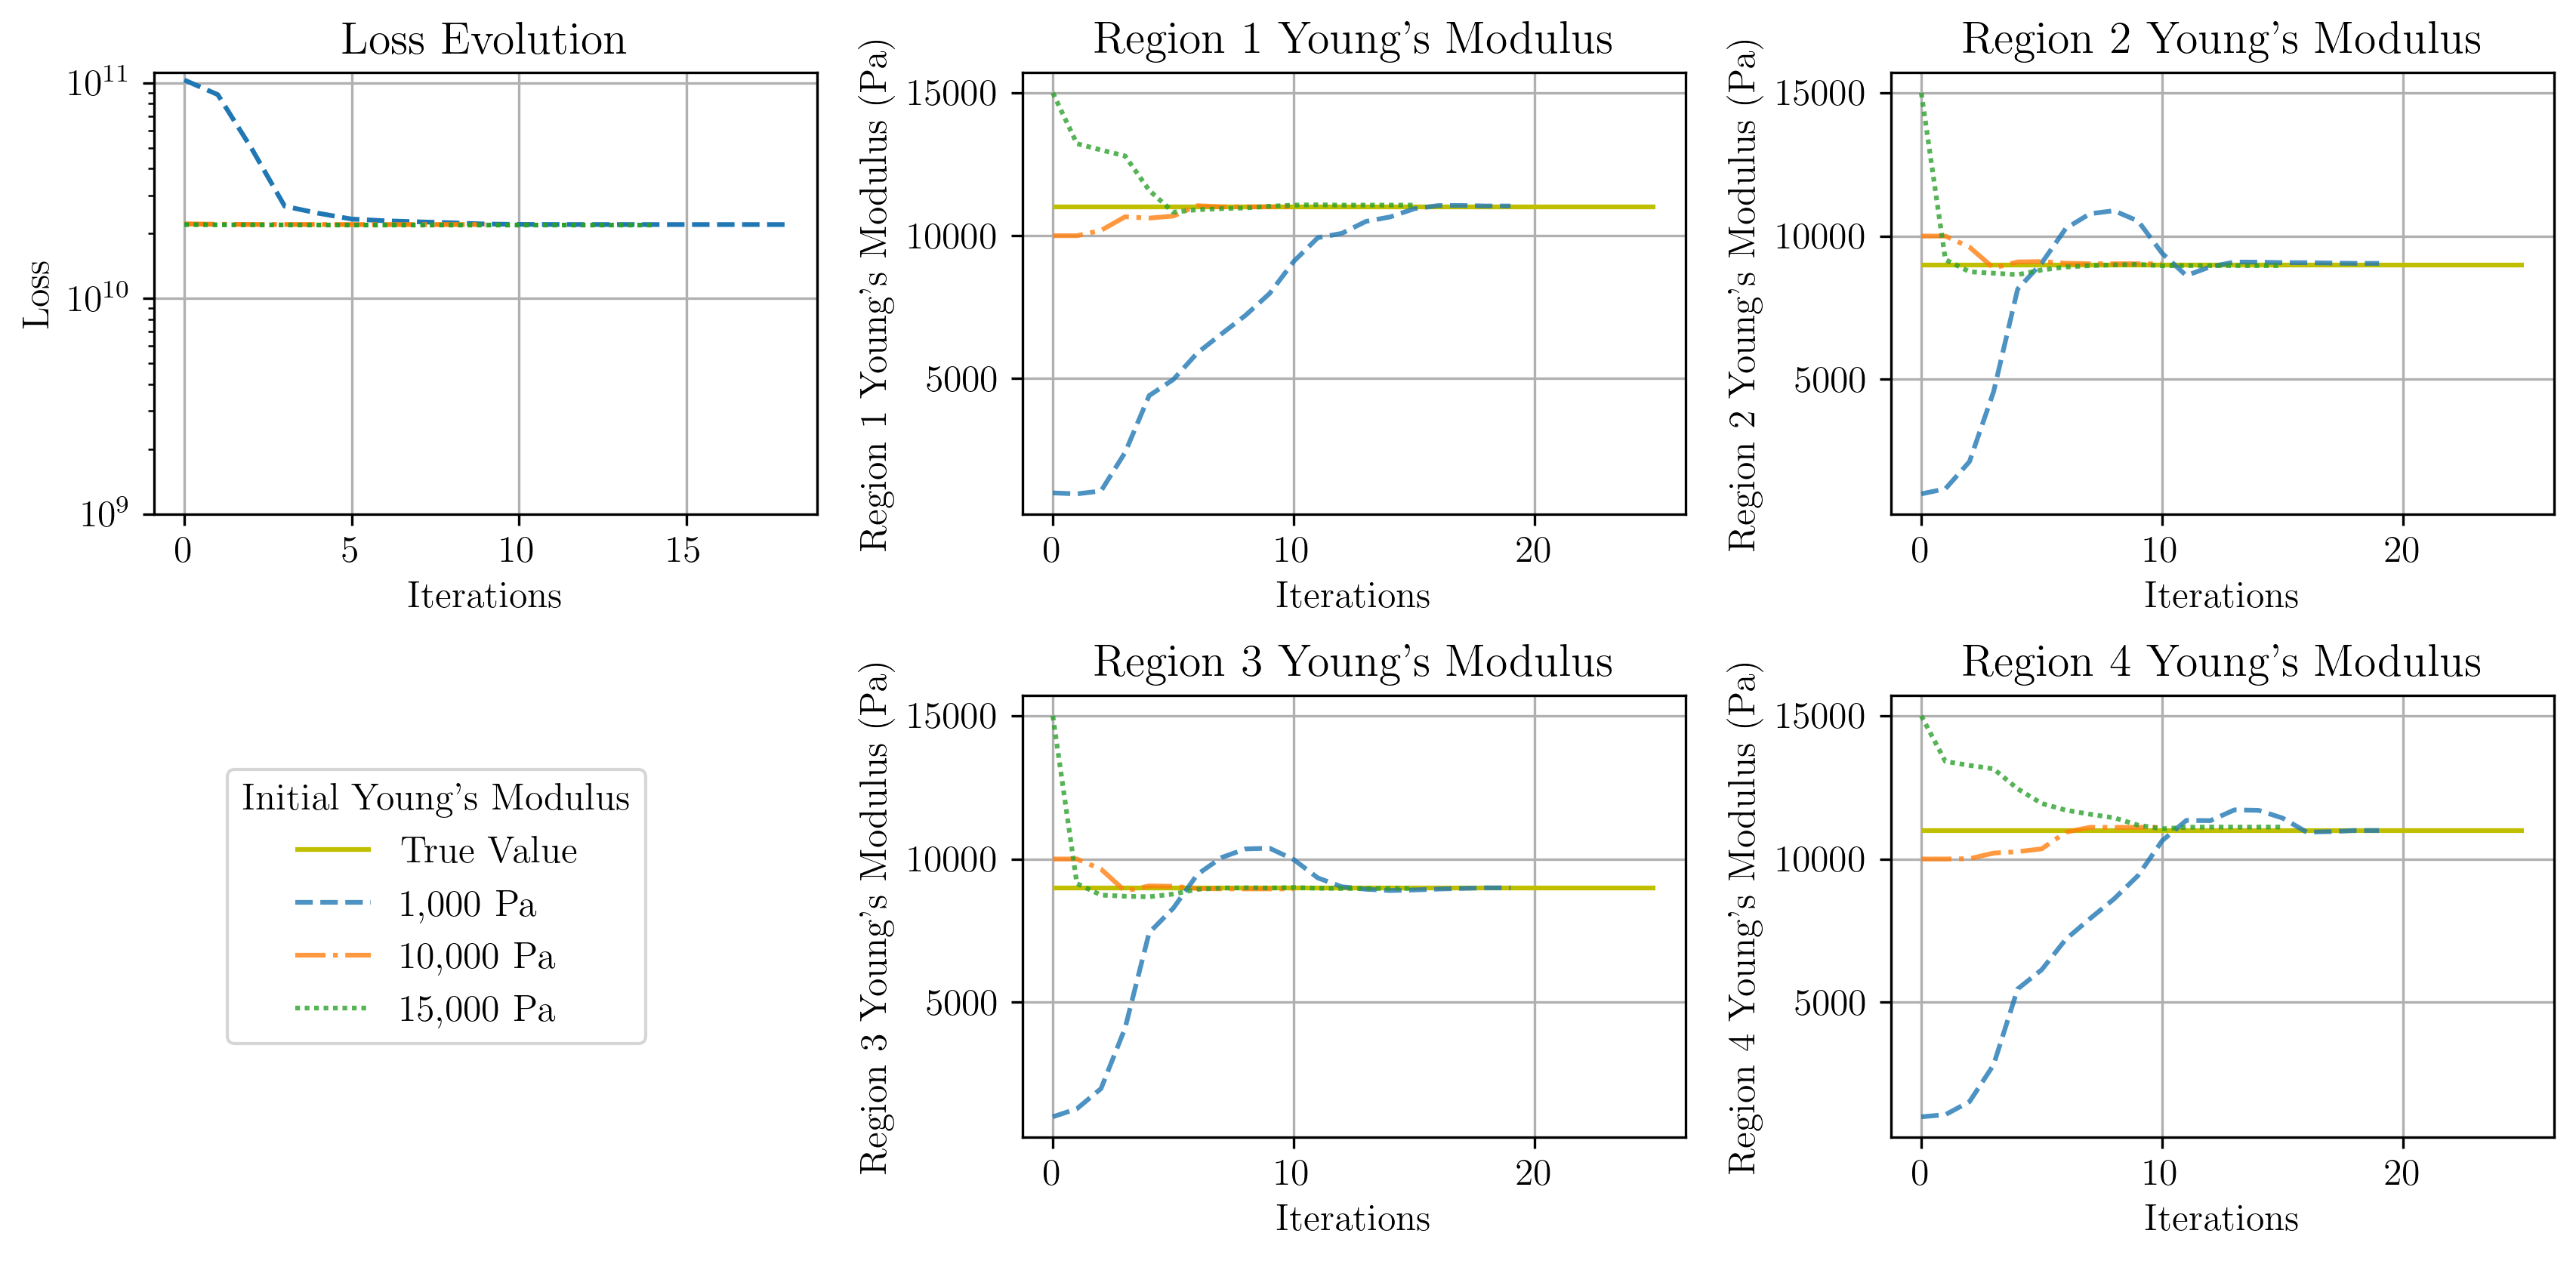

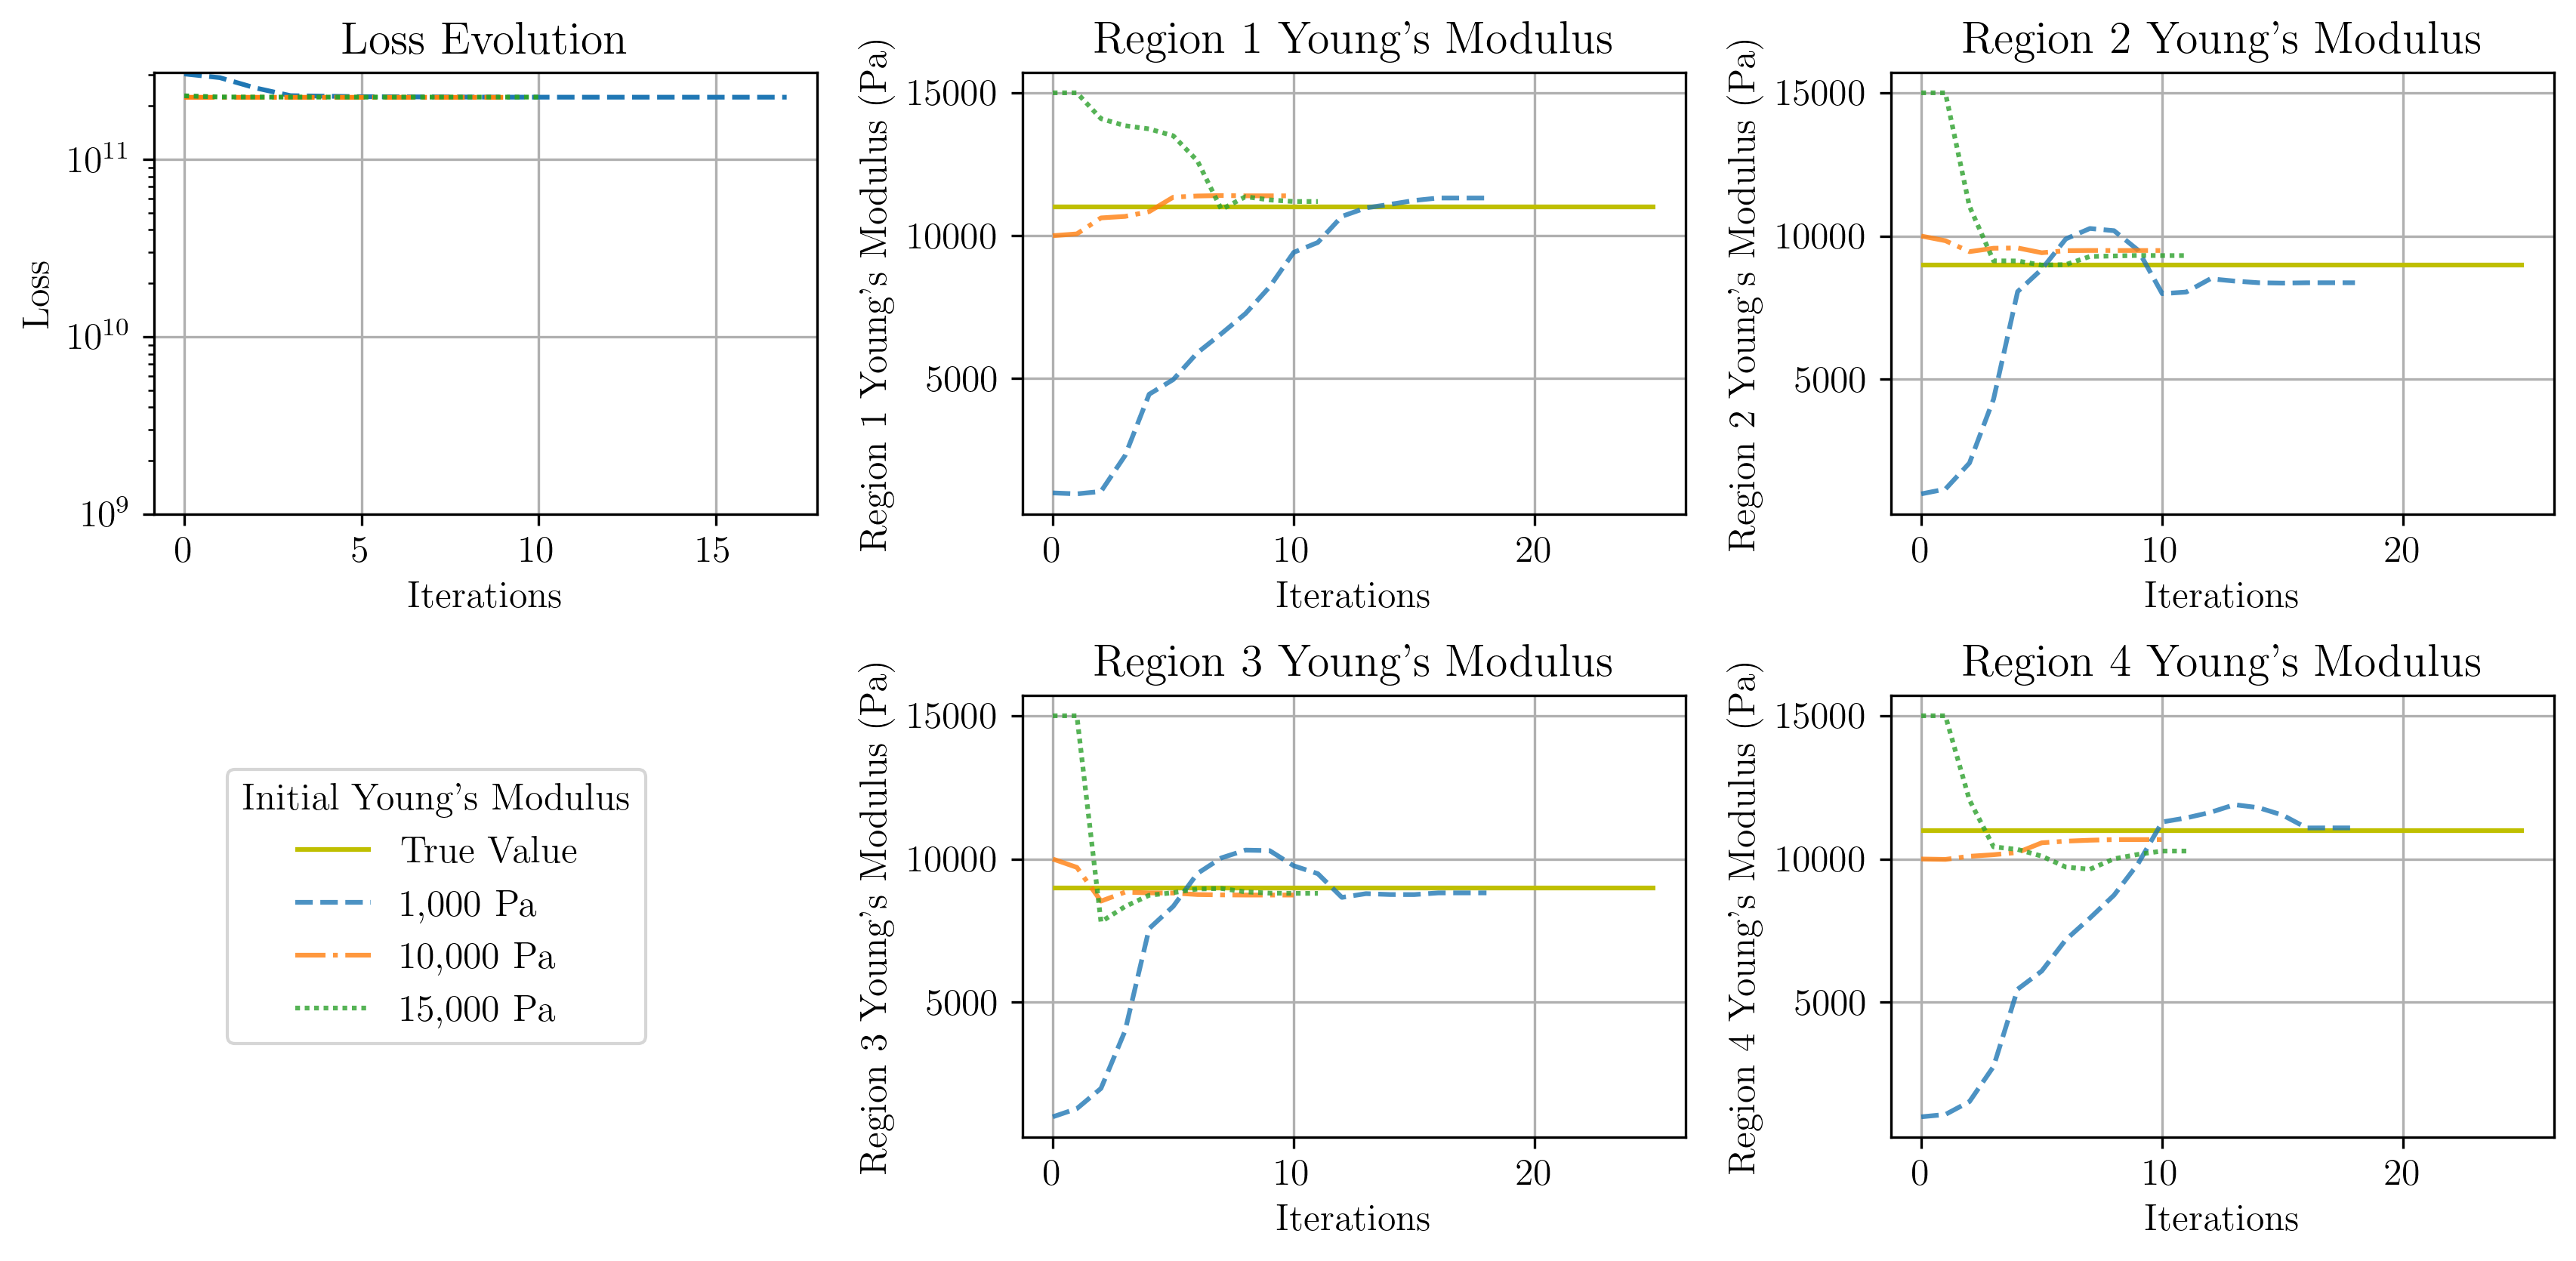

In [6]:
import matplotlib.pyplot as plt
import json
import numpy as np

snrs = [
    '384',
    '218',
    '78',
    '-30',
    '-131'
    ]


for snr in snrs:
    snr_num = float(snr) / 10

    filenames = [
        'result_db_' + snr + '_init_1e3.json',
        'result_db_' + snr + '_init_1e4.json',
        'result_db_' + snr + '_init_15e4.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["Middle", "High", "Low"]
    
    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4

        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)
linestyle_str = [
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)

for snr in snrs:

    snr_num = float(snr) / 10

    filenames = [
        'result_db_' + snr + '_init_1e3.json',
        'result_db_' + snr + '_init_1e4.json',
        'result_db_' + snr + '_init_15e4.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)

    fig, axs = plt.subplots(2,3, figsize=(12, 6))
    # plt.suptitle('Particle-wise Noise, SNR = ' + str(snr_num) + ' dB')
    plt.tight_layout(pad=3)


    keys = ["E1", "E2", "E3", "E4"]
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    scale = [1, 1, 1, 1, 1, 1]
    labels = ['1,000 Pa',
            '10,000 Pa', 
            '15,000 Pa',
            '1e3',
            '2e4',
            '8 particles, $\epsilon_{xx}$']
    colors = []

    axs[0, 0].set_title("Loss Evolution")
    axs[0, 0].set_ylabel("Loss")
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xlabel("Iterations")
    for j, result in enumerate(results):
        axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], linestyle=linestyles[j])
    
    axs[0, 0].set_yscale('log')
    axs[1, 0].axis("off")

    regions = ['Region 1 Young\'s Modulus',
            'Region 2 Young\'s Modulus',
                'Region 3 Young\'s Modulus', 
                'Region 4 Young\'s Modulus']
    mapping = {
        0: [0, 1],
        1: [0, 2],
        2: [1, 1],
        3: [1, 2]
    }
    for i, key in enumerate(keys):
        index = mapping[i]
        max_its = max([len(result[key]) for key in keys])
        axs[index[0], index[1]].set_title(regions[i])
        axs[index[0], index[1]].set_ylabel(regions[i] + " (Pa)")
        axs[index[0], index[1]].set_xlabel("Iterations")
        axs[index[0], index[1]].hlines(Es[i], 0, 25, color='y', label='True Value')
        for j, result in enumerate(results):
            axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], linestyle=linestyles[j])
    axs[0, 1].legend(loc=(-1.2, -1.2), title='Initial Young\'s Modulus')
    axs[0, 0].grid(True)
    axs[0, 1].grid(True)
    axs[0, 2].grid(True)
    axs[1, 1].grid(True)
    axs[1, 2].grid(True)
    # axs[0, 1].set_xticks(np.arange(0, 30, 5))
    # axs[0, 2].set_xticks(np.arange(0, 30, 5))
    # axs[1, 1].set_xticks(np.arange(0, 30, 5))
    # axs[1, 2].set_xticks(np.arange(0, 30, 5))
    axs[0, 0].set_yticks([1e9, 1e10, 1e11])
    # axs[0, 2].set_yticks(np.arange(2500, 15000, 2500))
    # axs[1, 1].set_yticks(np.arange(2500, 15000, 2500))
    # axs[1, 2].set_yticks(np.arange(2500, 15000, 2500))
    plt.show()


-13.1 dB noise convergence error(Middlestart:  3.177124925412268 %
-13.1 dB noise convergence error(Highstart:  3.7270799015285747 %
-13.1 dB noise convergence error(Lowstart:  3.5270582647036113 %
-3.0 dB noise convergence error(Middlestart:  0.248609477116725 %
-3.0 dB noise convergence error(Highstart:  0.4787276879474989 %
-3.0 dB noise convergence error(Lowstart:  0.5940396419365486 %
7.8 dB noise convergence error(Middlestart:  0.09593220221574823 %
7.8 dB noise convergence error(Highstart:  0.34788764837345304 %
7.8 dB noise convergence error(Lowstart:  0.22417577243176853 %
21.8 dB noise convergence error(Middlestart:  0.06077211806263672 %
21.8 dB noise convergence error(Highstart:  0.0493796394324409 %
21.8 dB noise convergence error(Lowstart:  0.02784025572724856 %
38.4 dB noise convergence error(Middlestart:  0.066649739539722 %
38.4 dB noise convergence error(Highstart:  0.005740929779993607 %
38.4 dB noise convergence error(Lowstart:  0.07936240341594596 %


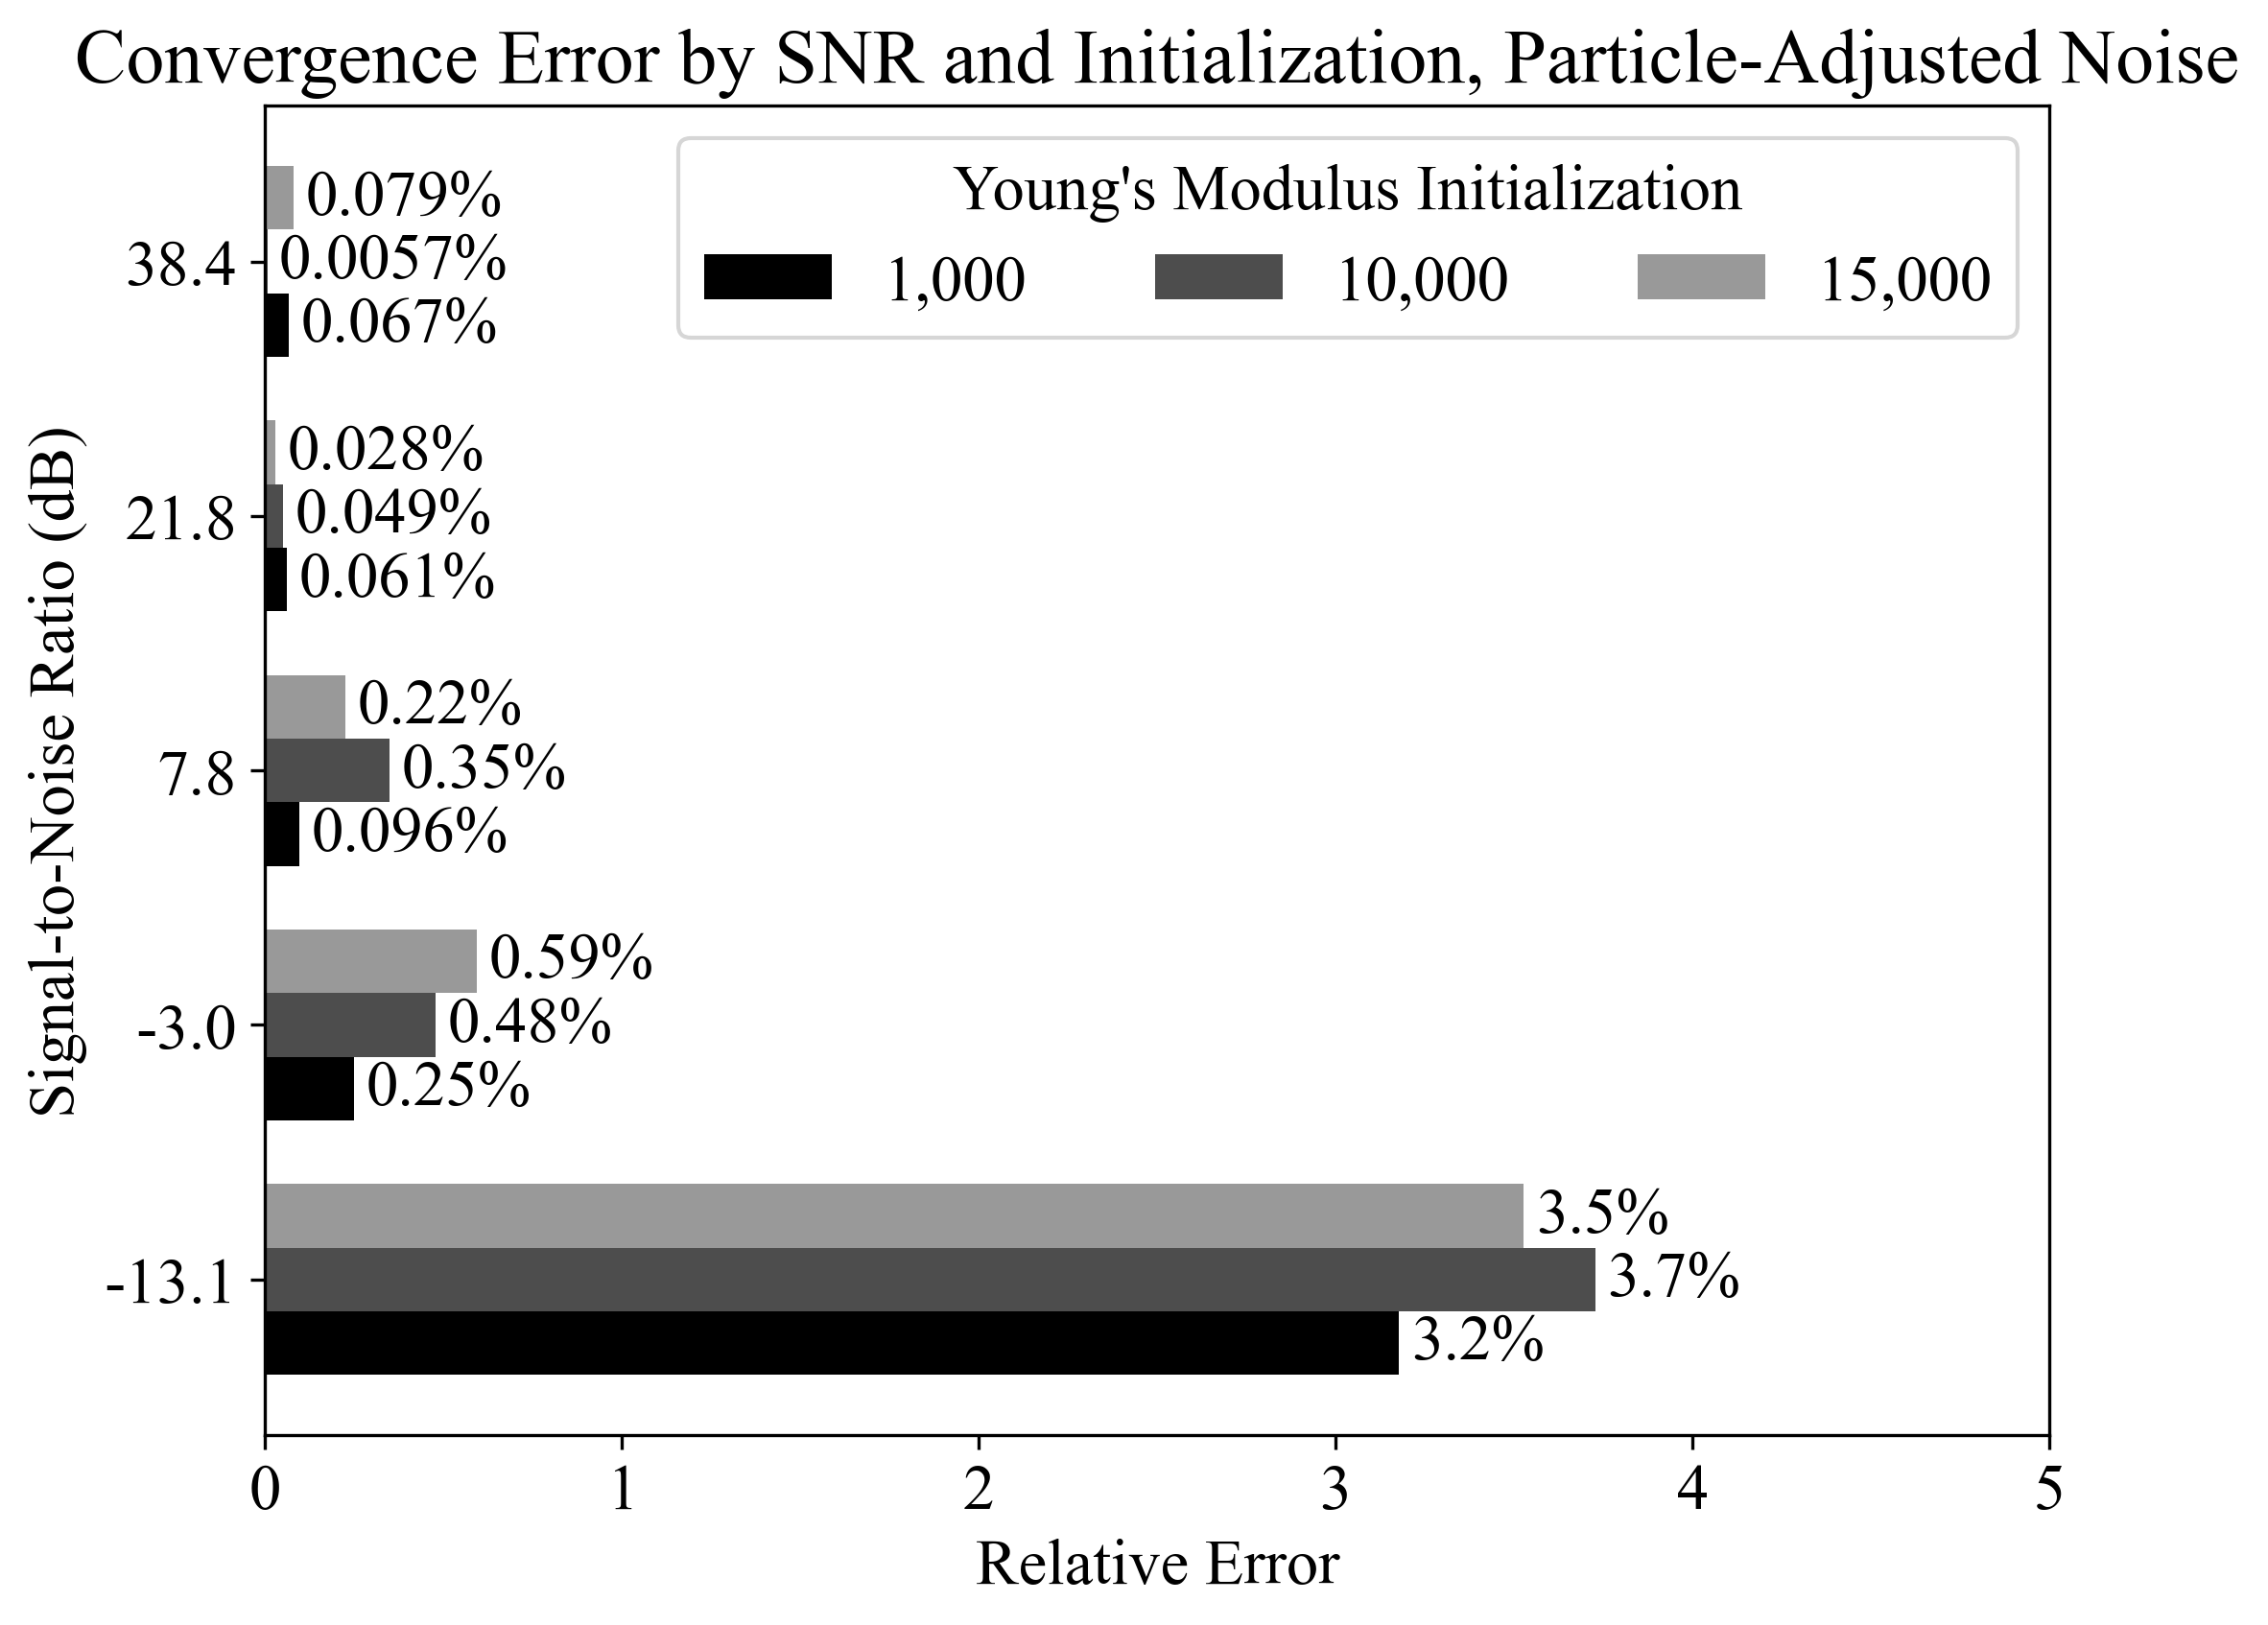

array([[3.17712493e-02, 2.48609477e-03, 9.59322022e-04, 6.07721181e-04,
        6.66497395e-04],
       [3.72707990e-02, 4.78727688e-03, 3.47887648e-03, 4.93796394e-04,
        5.74092978e-05],
       [3.52705826e-02, 5.94039642e-03, 2.24175772e-03, 2.78402557e-04,
        7.93624034e-04]])

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import json

snrs = [
    '384',
    '218',
    '78',
    '-30',
    '-131'
    ]
snrs.reverse()
snr_strs = [str(float(snr) / 10) for snr in snrs]
initializations = ['1,000', '10,000', '15,000']
errs = []
linestyle_str = [
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)


for snr in snrs:
    snr_num = float(snr) / 10
    
    filenames = [
        'result_db_' + snr + '_init_1e3.json',
        'result_db_' + snr + '_init_1e4.json',
        'result_db_' + snr + '_init_15e4.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)
    Es = [1.1e4, 0.9e4, 0.9e4, 1.1e4]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["Middle", "High", "Low"]
    
    err = []

    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4
        err.append(avg_err)
        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')

    errs.append(err)

errs = np.array(errs).transpose()
species = snr_strs
penguin_means = {
    '1,000': errs[0],
    '10,000': errs[1],
    '15,000': errs[2],
}
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 16}
matplotlib.rc('font', **font)

x = np.arange(len(snr_strs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(8,6))
# fmt = '%.2g%%' # Format you want the ticks, e.g. '40%'
# xticks = mtick.FormatStrFormatter(fmt)
# ax.xaxis.set_major_formatter(xticks)

for j, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement*100, width, label=attribute, color=gray(j*0.3))
    ax.bar_label(rects, padding=3, fmt='%.2g%%')
    # ax.bar_label(rects, padding=3, labels=[f"{100*a:.2g}%" + "\\%" for a in measurement])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Relative Error')
ax.set_title('Convergence Error by SNR and Initialization, Particle-Adjusted Noise')
ax.set_yticks(x + width, species)
ax.set_ylabel('Signal-to-Noise Ratio (dB)')
ax.legend(ncols=3, title='Young\'s Modulus Initialization')
ax.set_xlim(0, 5)

plt.show()
errs

20.0 dB noise convergence error(Middlestart:  0.05462170632044302 %
20.0 dB noise convergence error(Highstart:  0.04105881228732234 %
20.0 dB noise convergence error(Lowstart:  0.11363894649910819 %
10.0 dB noise convergence error(Middlestart:  0.15513762002454523 %
10.0 dB noise convergence error(Highstart:  0.16572519289358795 %
10.0 dB noise convergence error(Lowstart:  0.15059246510572025 %
0.0 dB noise convergence error(Middlestart:  0.4572570146169093 %
0.0 dB noise convergence error(Highstart:  0.6870885993254515 %
0.0 dB noise convergence error(Lowstart:  0.980897146023262 %
-10.0 dB noise convergence error(Middlestart:  1.2174460516925585 %
-10.0 dB noise convergence error(Highstart:  3.5112436163865777 %
-10.0 dB noise convergence error(Lowstart:  1.9344766434308582 %


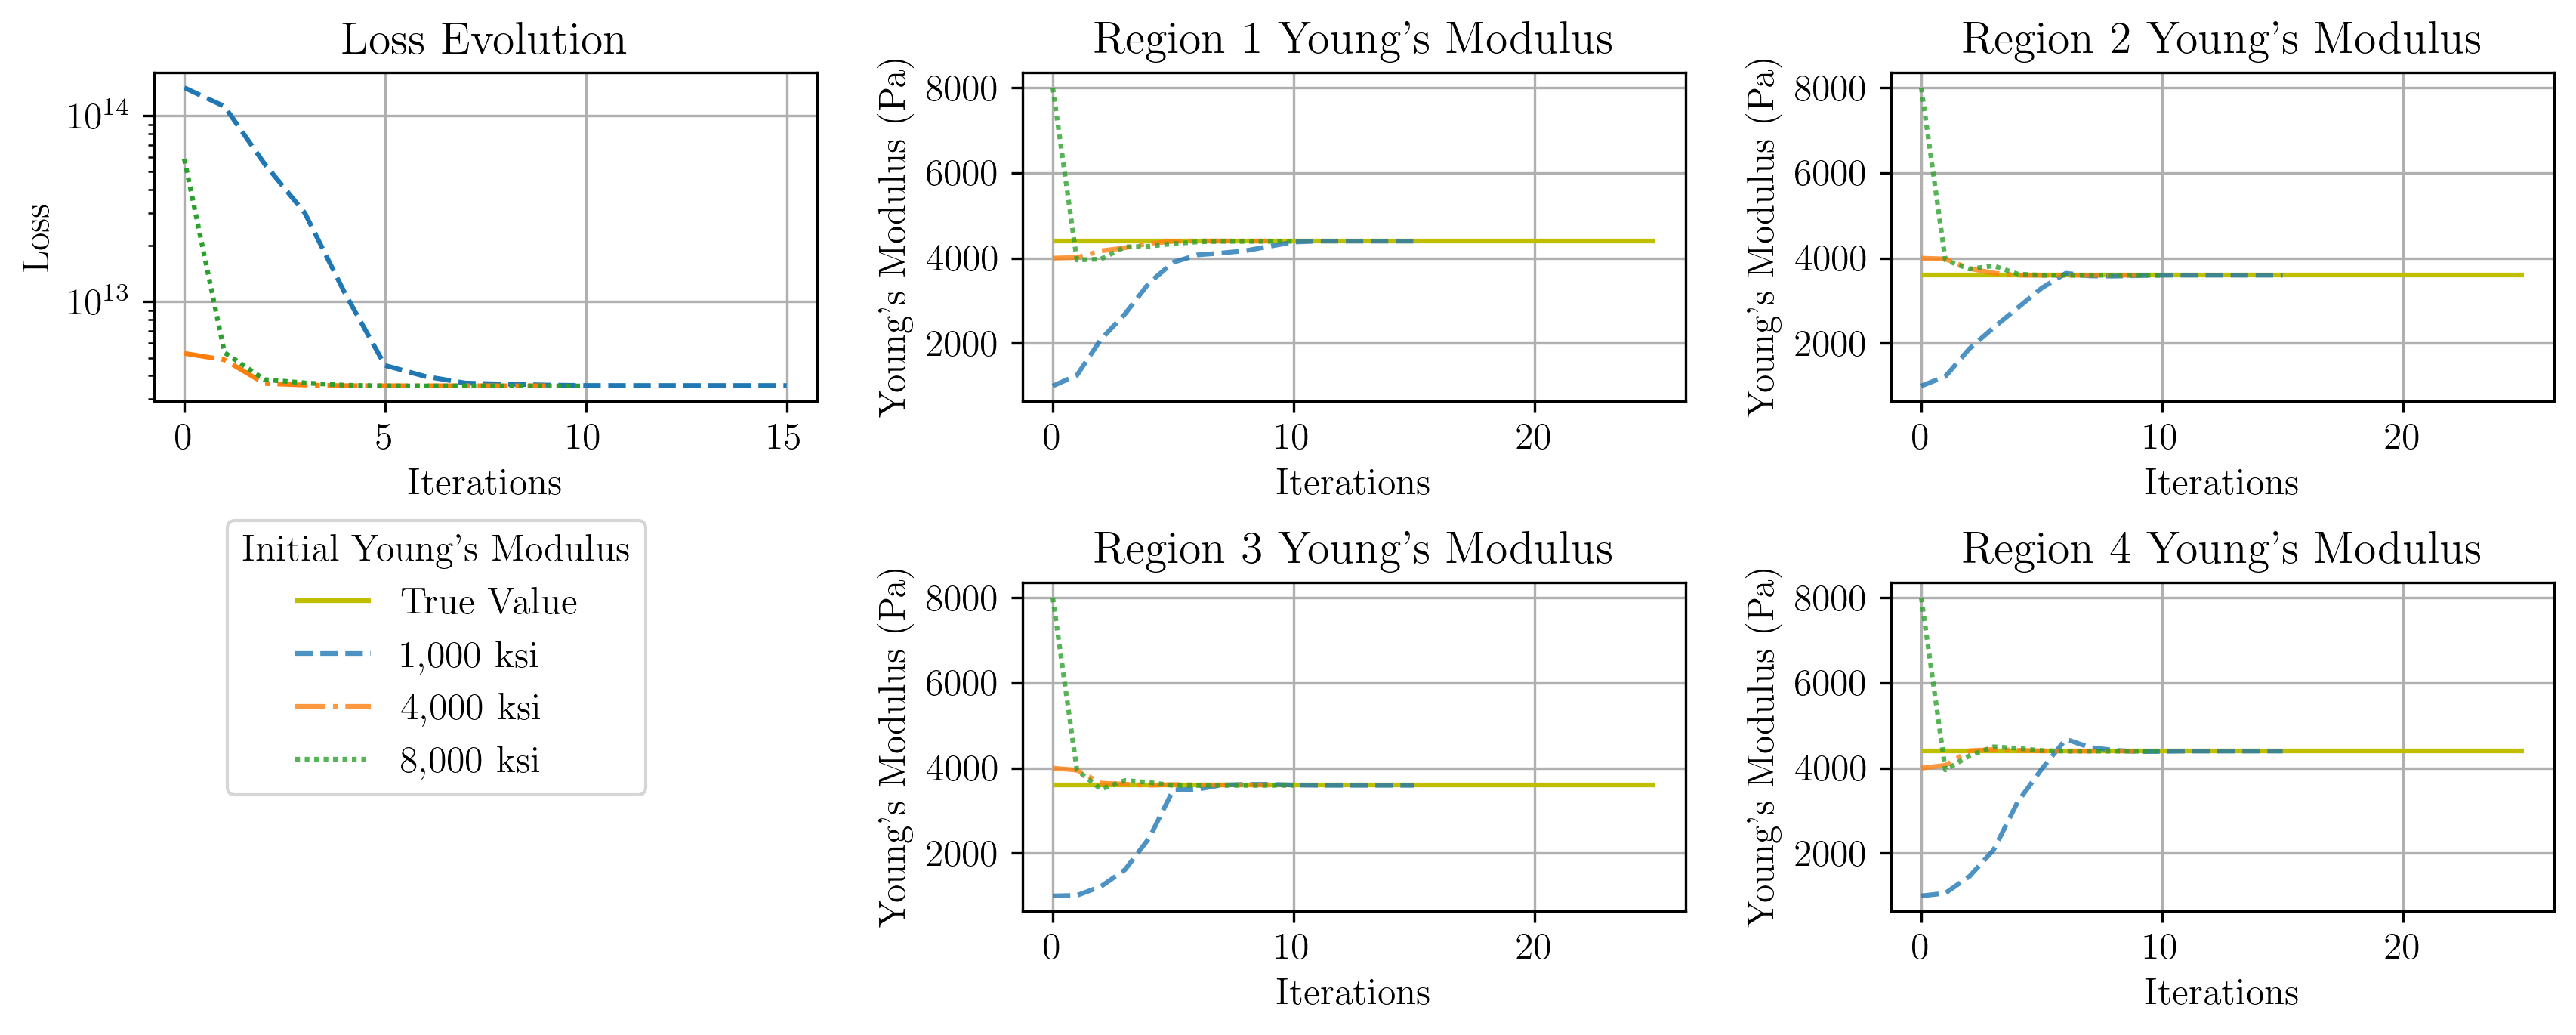

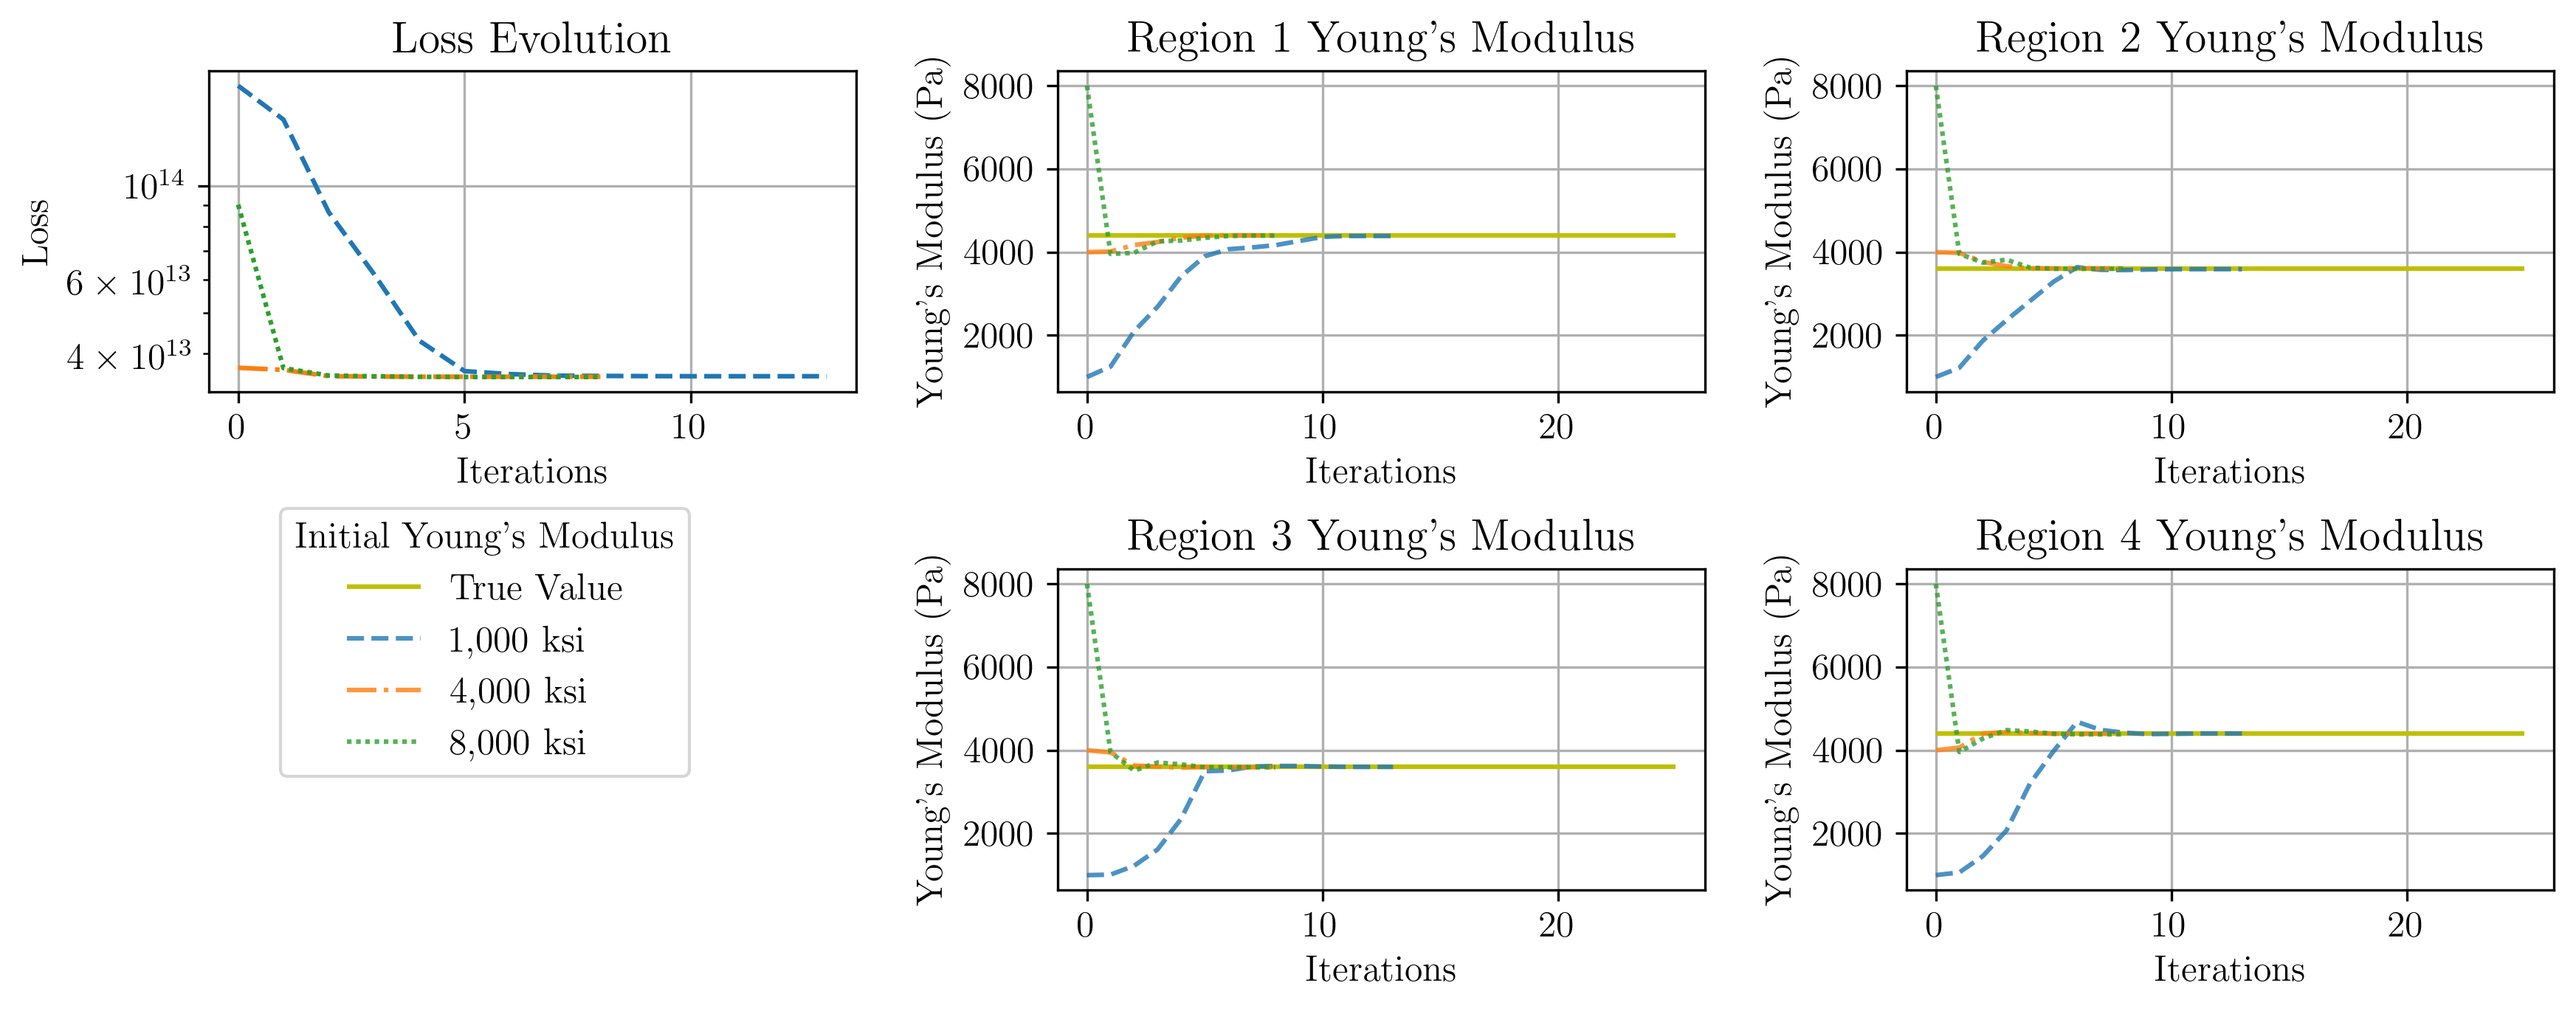

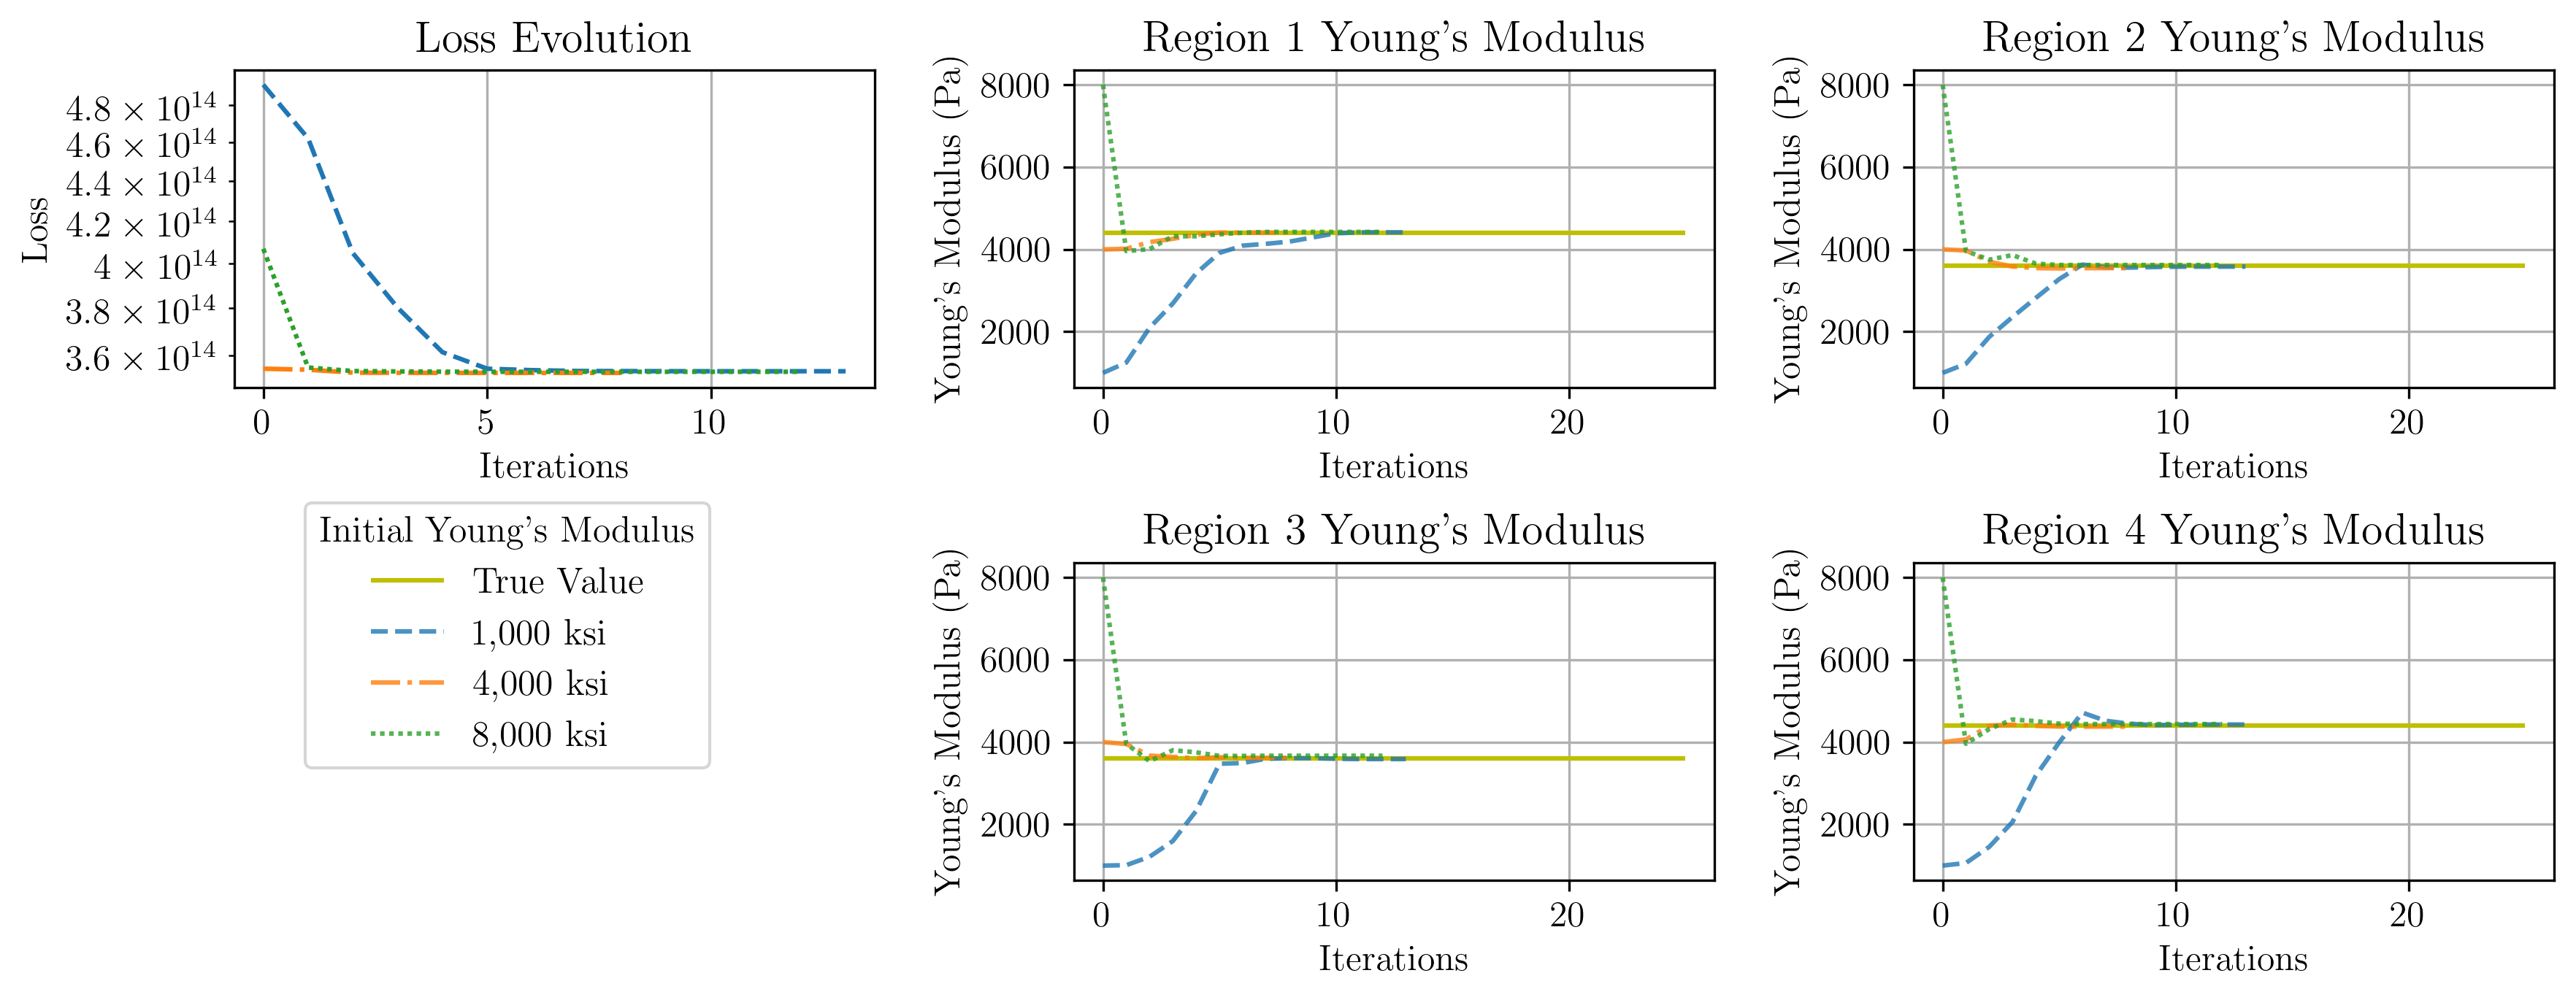

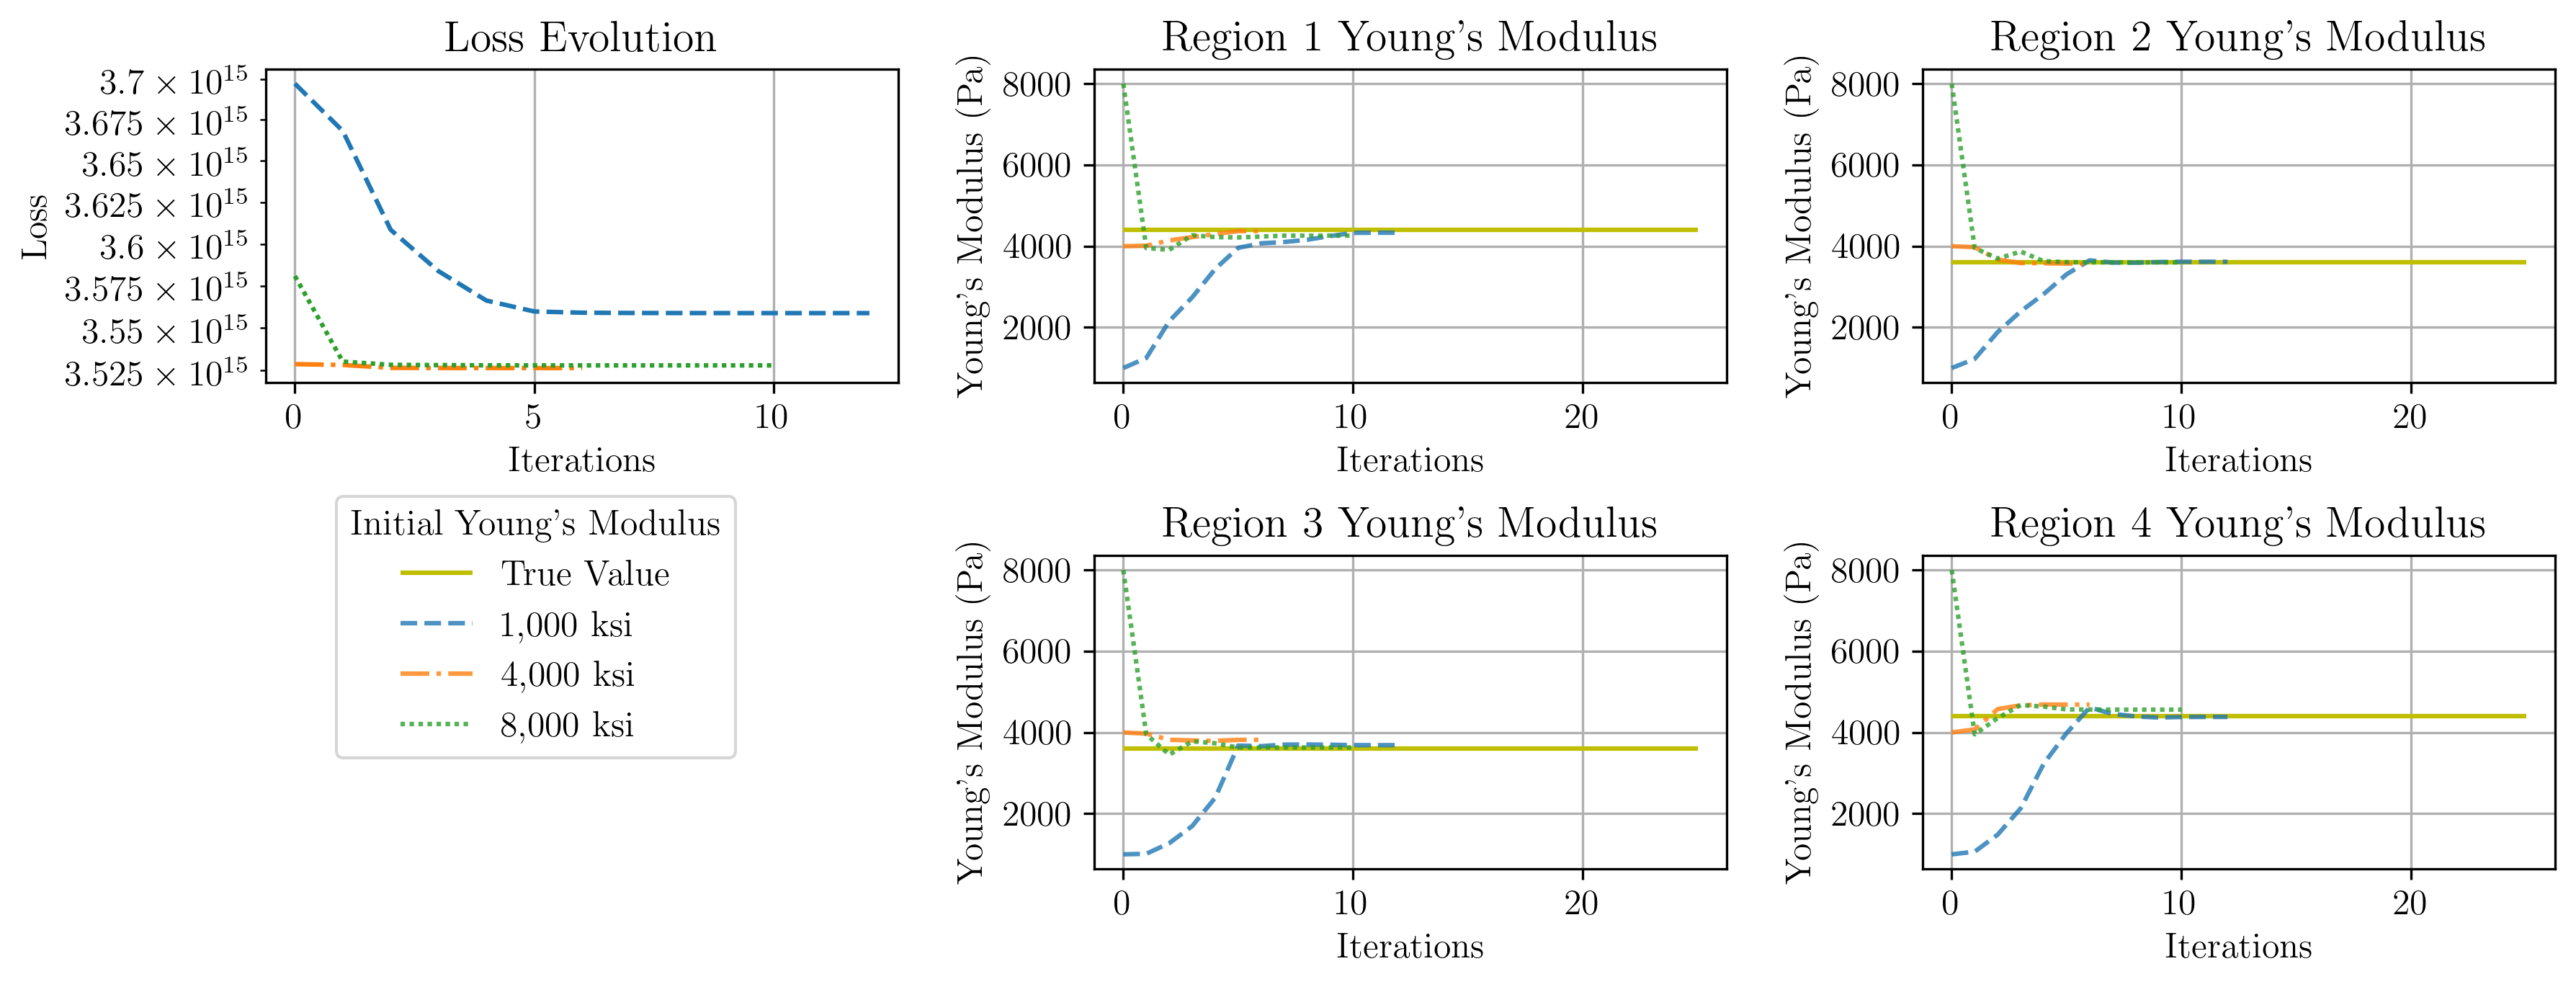

In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np

snrs = [
    '20',
    '10',
    '0',
    '-10',
    ]


for snr in snrs:
    snr_num = float(snr)

    filenames = [
        'r_c_' + snr + '_1000.json',
        'r_c_' + snr + '_4000.json',
        'r_c_' + snr + '_8000.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)
    Es = [4.4e3, 3.6e3, 3.6e3, 4.4e3]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["Middle", "High", "Low"]
    
    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4

        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)
linestyle_str = [
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)

for snr in snrs:

    snr_num = float(snr)

    filenames = [
        'r_c_' + snr + '_1000.json',
        'r_c_' + snr + '_4000.json',
        'r_c_' + snr + '_8000.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)

    fig, axs = plt.subplots(2,3, figsize=(12, 5))
    # plt.suptitle('Particle-wise Noise, SNR = ' + str(snr_num) + ' dB')
    plt.tight_layout(pad=3)


    keys = ["E1", "E2", "E3", "E4"]
    Es = [4.4e3, 3.6e3, 3.6e3, 4.4e3]
    scale = [1, 1, 1, 1, 1, 1]
    labels = ['1,000 ksi',
            '4,000 ksi', 
            '8,000 ksi',
            '1e3',
            '2e4',
            '8 particles, $\epsilon_{xx}$']
    colors = []

    axs[0, 0].set_title("Loss Evolution")
    axs[0, 0].set_ylabel("Loss")
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xlabel("Iterations")
    for j, result in enumerate(results):
        axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], linestyle=linestyles[j])
    
    axs[0, 0].set_yscale('log')
    axs[1, 0].axis("off")

    regions = ['Region 1 Young\'s Modulus',
            'Region 2 Young\'s Modulus',
                'Region 3 Young\'s Modulus', 
                'Region 4 Young\'s Modulus']
    mapping = {
        0: [0, 1],
        1: [0, 2],
        2: [1, 1],
        3: [1, 2]
    }
    for i, key in enumerate(keys):
        index = mapping[i]
        max_its = max([len(result[key]) for key in keys])
        axs[index[0], index[1]].set_title(regions[i])
        axs[index[0], index[1]].set_ylabel("Young's Modulus (Pa)")
        axs[index[0], index[1]].set_xlabel("Iterations")
        axs[index[0], index[1]].hlines(Es[i], 0, 25, color='y', label='True Value')
        for j, result in enumerate(results):
            axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], linestyle=linestyles[j])
    axs[0, 1].legend(loc=(-1.2, -1.2), title='Initial Young\'s Modulus')
    axs[0, 0].grid(True)
    axs[0, 1].grid(True)
    axs[0, 2].grid(True)
    axs[1, 1].grid(True)
    axs[1, 2].grid(True)
    # axs[0, 1].set_xticks(np.arange(0, 30, 5))
    # axs[0, 2].set_xticks(np.arange(0, 30, 5))
    # axs[1, 1].set_xticks(np.arange(0, 30, 5))
    # axs[1, 2].set_xticks(np.arange(0, 30, 5))
    # axs[0, 0].set_yticks([1e9, 1e10, 1e11])
    # axs[0, 2].set_yticks(np.arange(2500, 15000, 2500))
    # axs[1, 1].set_yticks(np.arange(2500, 15000, 2500))
    # axs[1, 2].set_yticks(np.arange(2500, 15000, 2500))
    plt.show()


-10.0 dB noise convergence error(Middlestart:  1.2174460516925585 %
-10.0 dB noise convergence error(Highstart:  3.5112436163865777 %
-10.0 dB noise convergence error(Lowstart:  1.9344766434308582 %
0.0 dB noise convergence error(Middlestart:  0.4572570146169093 %
0.0 dB noise convergence error(Highstart:  0.6870885993254515 %
0.0 dB noise convergence error(Lowstart:  0.980897146023262 %
10.0 dB noise convergence error(Middlestart:  0.15513762002454523 %
10.0 dB noise convergence error(Highstart:  0.16572519289358795 %
10.0 dB noise convergence error(Lowstart:  0.15059246510572025 %
20.0 dB noise convergence error(Middlestart:  0.05462170632044302 %
20.0 dB noise convergence error(Highstart:  0.04105881228732234 %
20.0 dB noise convergence error(Lowstart:  0.11363894649910819 %


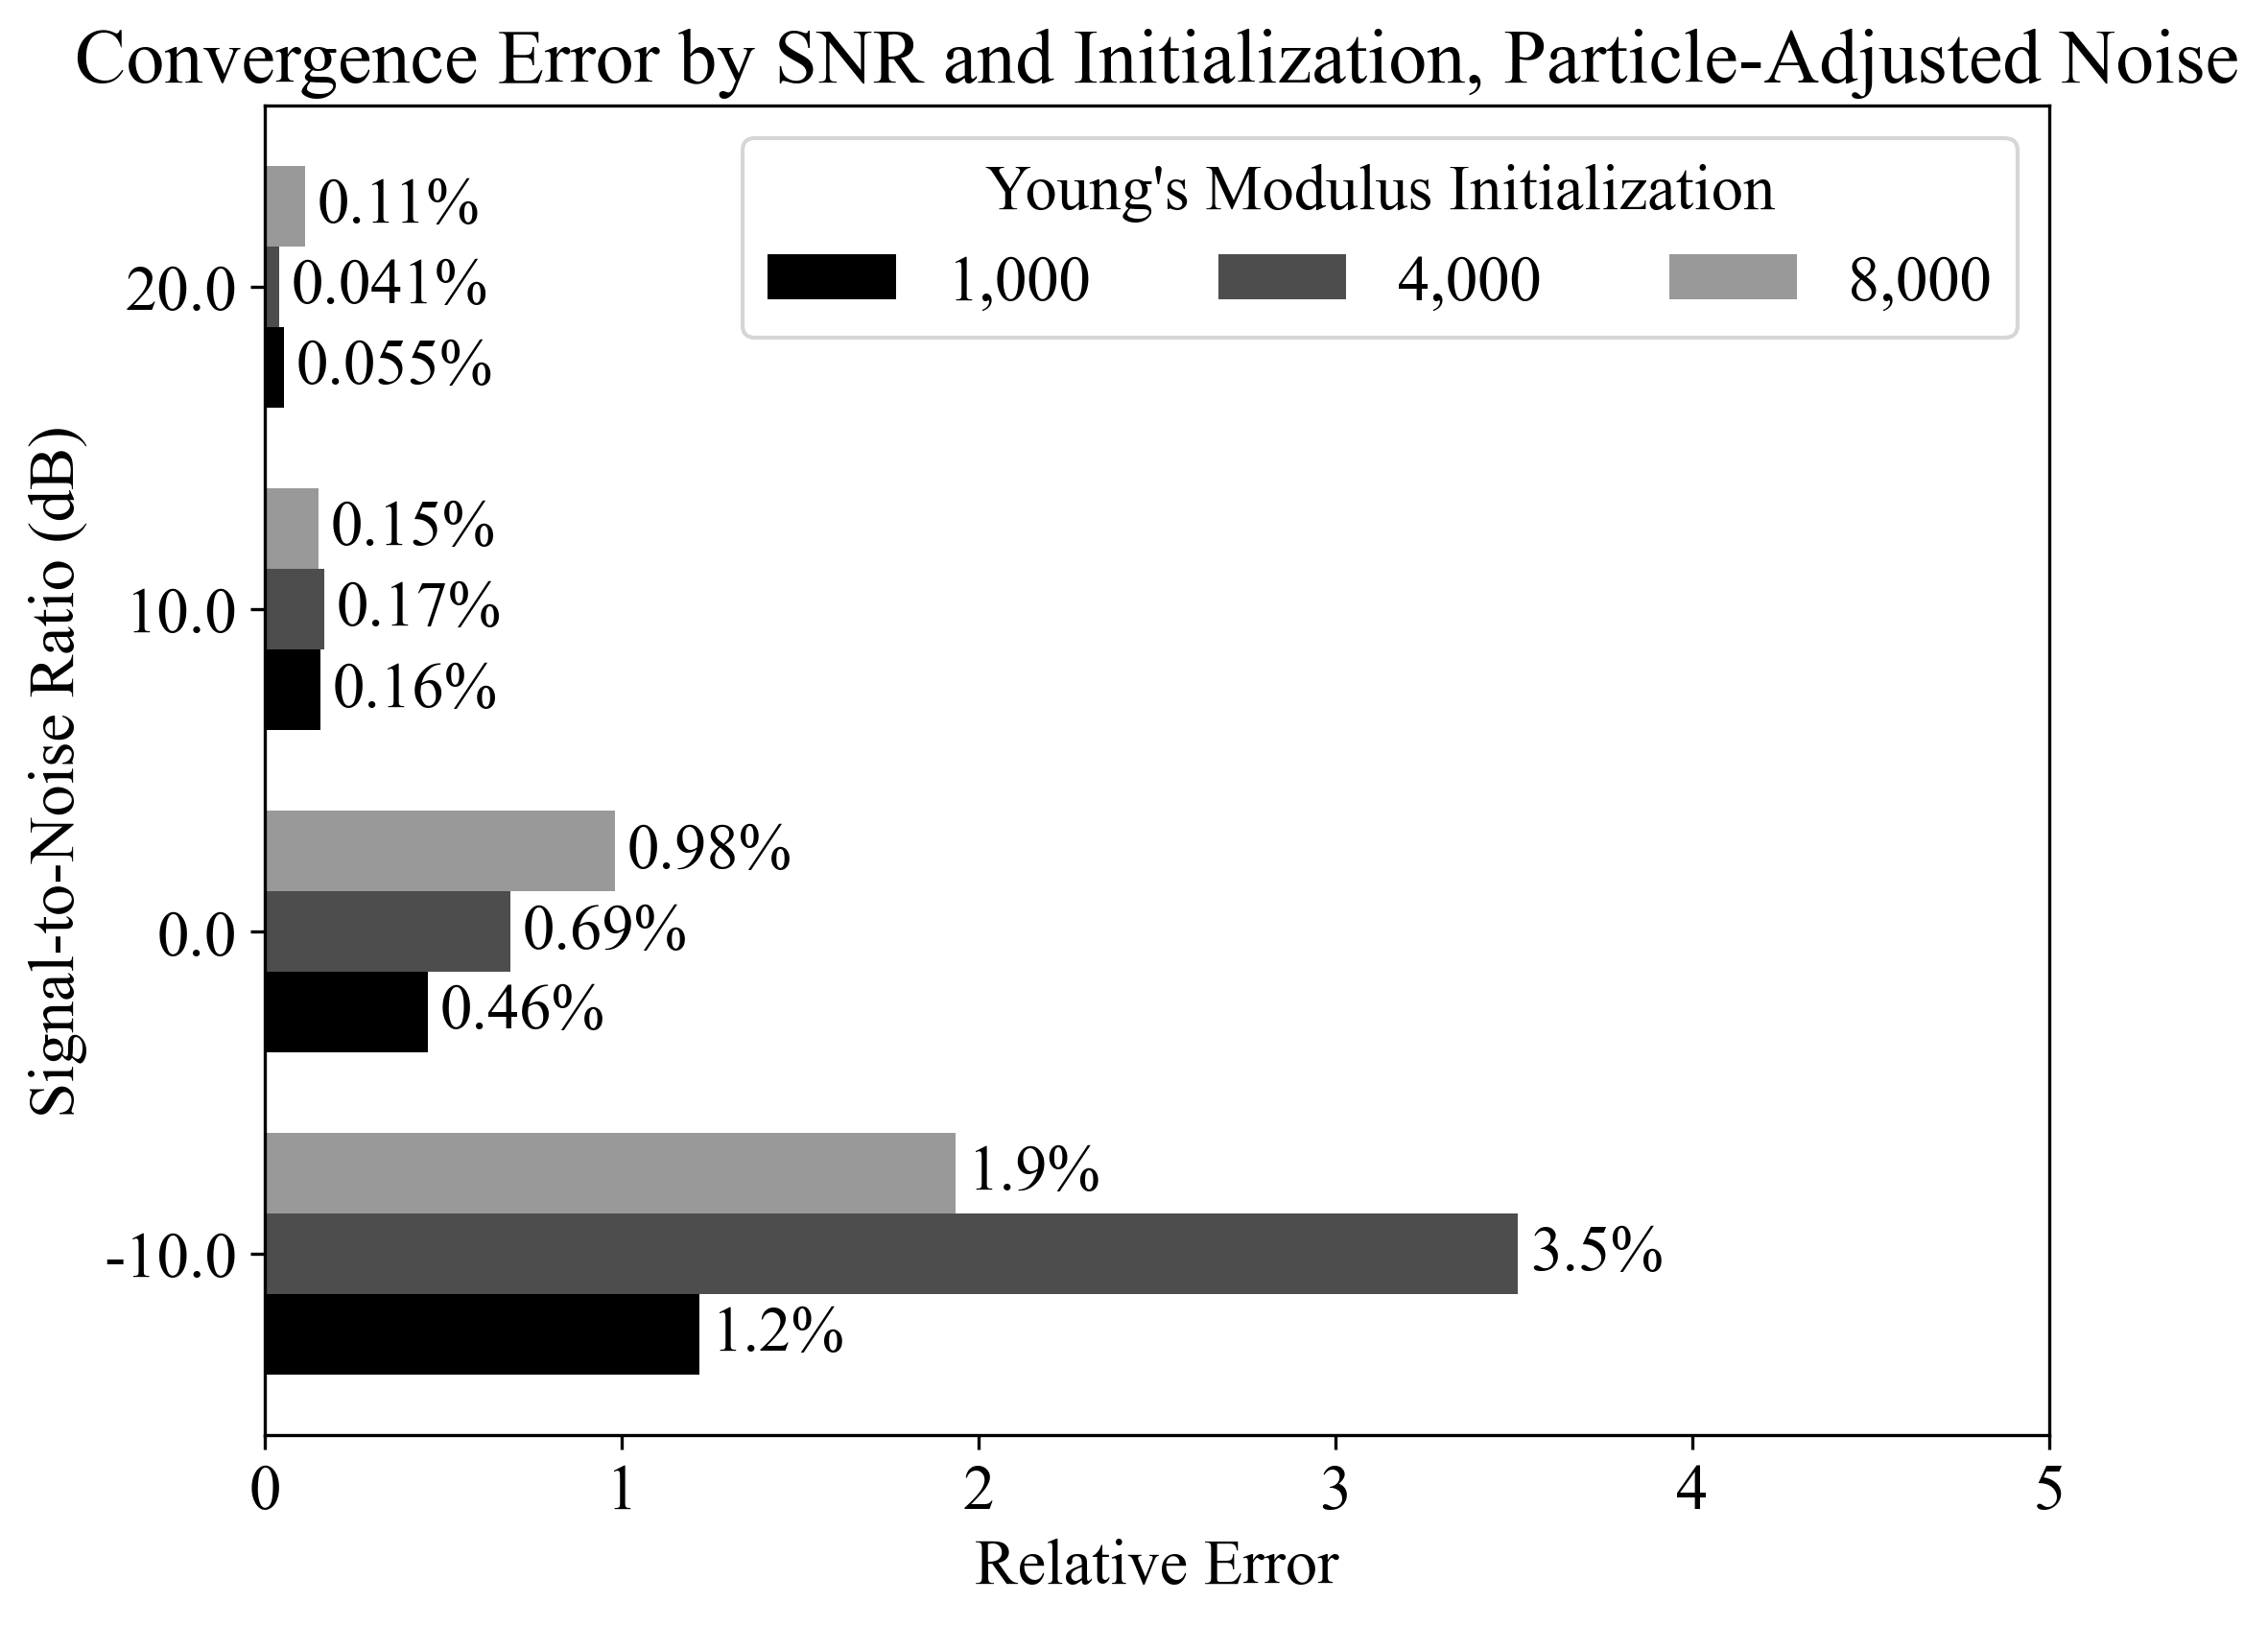

array([[0.01217446, 0.00457257, 0.00155138, 0.00054622],
       [0.03511244, 0.00687089, 0.00165725, 0.00041059],
       [0.01934477, 0.00980897, 0.00150592, 0.00113639]])

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import json


snrs = [
    '20',
    '10',
    '0',
    '-10',
    ]


for snr in snrs:
    snr_num = float(snr)

    filenames = [
        'r_c_' + snr + '_1000.json',
        'r_c_' + snr + '_4000.json',
        'r_c_' + snr + '_8000.json',
    ]
snrs.reverse()
snr_strs = [str(float(snr)) for snr in snrs]
initializations = ['1,000', '4,000', '8,000']
errs = []
linestyle_str = [
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)


for snr in snrs:
    snr_num = float(snr)

    filenames = [
        'r_c_' + snr + '_1000.json',
        'r_c_' + snr + '_4000.json',
        'r_c_' + snr + '_8000.json',
    ]
    results = []
    for name in filenames:

        with open(name) as json_file:
            result = json.load(json_file)
            results.append(result)
    Es = [4.4e3, 3.6e3, 3.6e3, 4.4e3]
    keys = ["E1", "E2", "E3", "E4"]
    inits = ["Middle", "High", "Low"]
    
    err = []

    for j, init in enumerate(inits):
        avg_err = 0
        result = results[j]

        for i, key in enumerate(keys):
            avg_err += np.abs(result[key][-1] - Es[i]) / Es[i]
        
        avg_err = avg_err / 4
        err.append(avg_err)
        print(str(snr_num) + " dB noise convergence error" + "(" + init + "start: ", avg_err*100, '%')

    errs.append(err)

errs = np.array(errs).transpose()
species = snr_strs
penguin_means = {
    '1,000': errs[0],
    '4,000': errs[1],
    '8,000': errs[2],
}
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 16}
matplotlib.rc('font', **font)

x = np.arange(len(snr_strs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(8,6))
# fmt = '%.2g%%' # Format you want the ticks, e.g. '40%'
# xticks = mtick.FormatStrFormatter(fmt)
# ax.xaxis.set_major_formatter(xticks)

for j, (attribute, measurement) in enumerate(penguin_means.items()):
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement*100, width, label=attribute, color=gray(j*0.3))
    ax.bar_label(rects, padding=3, fmt='%.2g%%')
    # ax.bar_label(rects, padding=3, labels=[f"{100*a:.2g}%" + "\\%" for a in measurement])
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Relative Error')
ax.set_title('Convergence Error by SNR and Initialization, Particle-Adjusted Noise')
ax.set_yticks(x + width, species)
ax.set_ylabel('Signal-to-Noise Ratio (dB)')
ax.legend(ncols=3, title='Young\'s Modulus Initialization')
ax.set_xlim(0, 5)

plt.show()
errs